In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns

In [62]:
train_data = pd.read_csv('./data/merucari/train.tsv', delimiter='\t') 

In [63]:
train_data.head()

train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet  
1         0  This keyboard is in great condition and works ...  
2         1  Adorable top with a hint of lace and a key hol...  
3         1  New with tags. Leather horses. Retail for [rm]...  
4         0          Complete with certificate of authenticity

# check the histgram of price

<IPython.core.display.Javascript object>


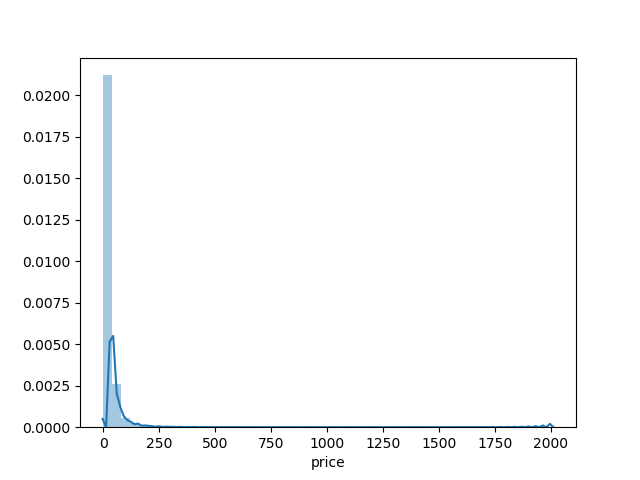

/Users/Yuki_U/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.distplot(ax=ax1,a=train_data['price'])

In [65]:
# basic statistics
train_data['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [66]:
train_data['price'].max() # max price

2009.0

In [67]:
train_data.query('price == "2009.0"') # item with max price

train_id                                 name  item_condition_id  \
760469    760469  NEW Chanel WOC Caviar Gold Hardware                  1   

                              category_name brand_name   price  shipping  \
760469  Women/Women's Handbags/Shoulder Bag     Chanel  2009.0         0   

                                         item_description  
760469  New with tag, box and dustbag but no receipt. ...

# price in item_condition

In [68]:
train_data.groupby('item_condition_id')['price'].describe()

count       mean        std  min   25%   50%    75%  \
item_condition_id                                                           
1                  640549.0  26.486967  35.418024  0.0  10.0  18.0  30.00   
2                  375479.0  27.563225  42.125698  0.0  11.0  17.0  29.00   
3                  432161.0  26.540711  40.030681  0.0  11.0  16.0  28.00   
4                   31962.0  24.349212  35.679148  0.0  10.0  15.0  26.00   
5                    2384.0  31.703859  39.531069  0.0  11.0  19.0  35.25   

                      max  
item_condition_id          
1                  2009.0  
2                  2004.0  
3                  2000.0  
4                  1309.0  
5                   522.0

1
count    640549.000000
mean         26.486967
std          35.418024
min           0.000000
25%          10.000000
50%          18.000000
75%          30.000000
max        2009.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


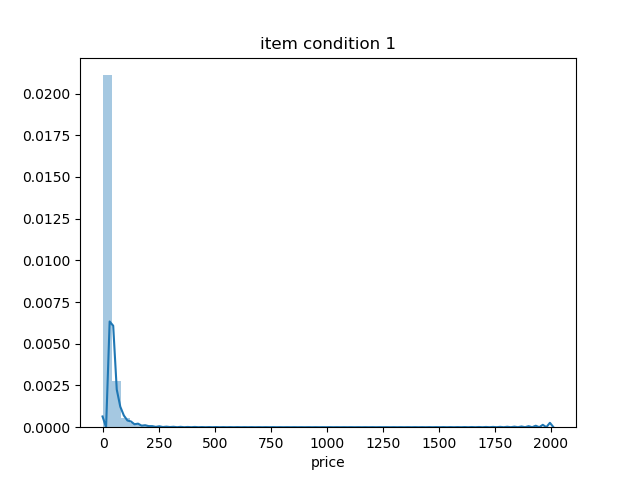

2
count    375479.000000
mean         27.563225
std          42.125698
min           0.000000
25%          11.000000
50%          17.000000
75%          29.000000
max        2004.000000
Name: price, dtype: float64


/Users/Yuki_U/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


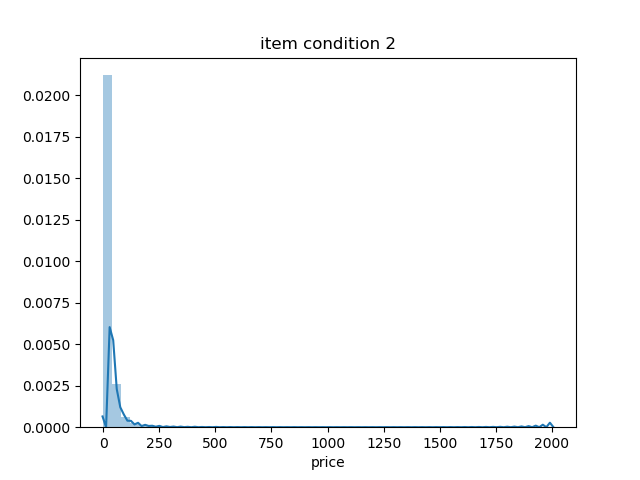

3
count    432161.000000
mean         26.540711
std          40.030681
min           0.000000
25%          11.000000
50%          16.000000
75%          28.000000
max        2000.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


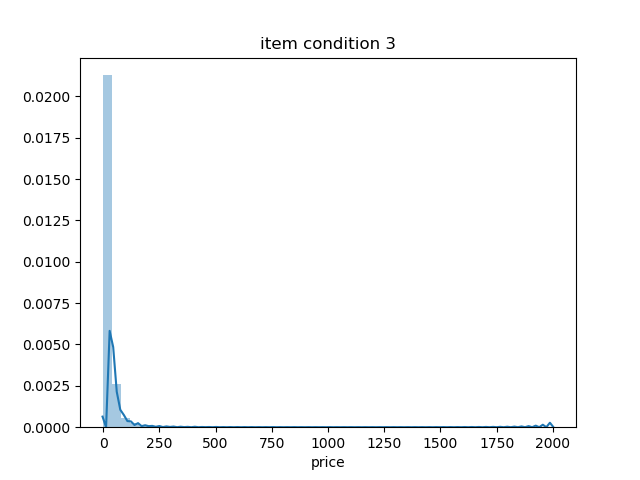

4
count    31962.000000
mean        24.349212
std         35.679148
min          0.000000
25%         10.000000
50%         15.000000
75%         26.000000
max       1309.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


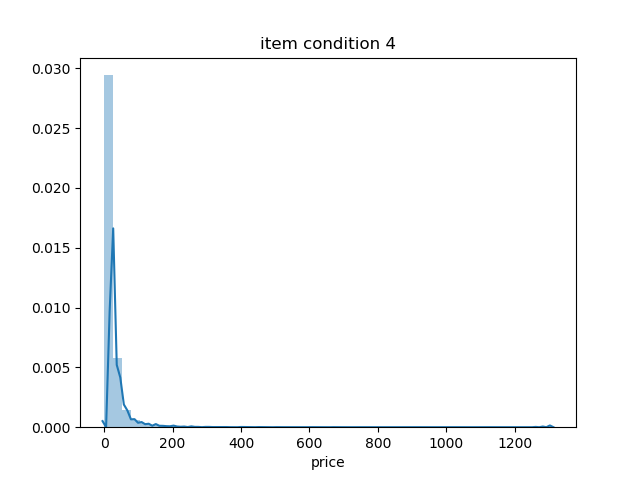

5
count    2384.000000
mean       31.703859
std        39.531069
min         0.000000
25%        11.000000
50%        19.000000
75%        35.250000
max       522.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


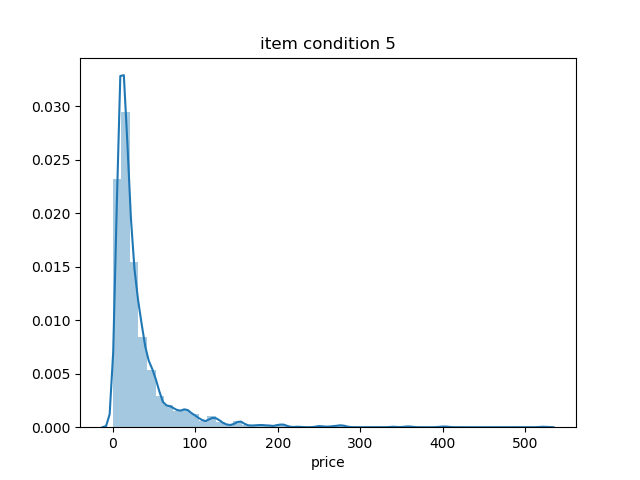

In [69]:
# hist and kde
for key, df in train_data.groupby('item_condition_id'):
    print(key)
    print(df['price'].describe())
    plt.figure()
    plt.title('item condition '+str(key))
    sns.distplot(df['price'])
    plt.show()

# memo
- item condition ... 75% price is about $30
- item condition 4 's mean price is less than item condition 5's mean price
- we can't decide the price only by item condition

# price in category 

In [70]:
# null check
train_data['category_name'].isnull().value_counts() # 6327 Null exist 

False    1476208
True        6327
Name: category_name, dtype: int64

In [71]:
# fill as 'NA/NA/NA'
train_data['category_name'].fillna('NA/NA/NA', inplace=True)

In [72]:
# make dataframe for category
category = pd.DataFrame(train_data['category_name'].str.split('/').tolist(),
            columns=['category_main', 'category_sub1', 'category_sub2', 'category_sub3',
                    'category_sub4'])

In [73]:
category.head()

category_main        category_sub1       category_sub2 category_sub3  \
0           Men                 Tops            T-shirts          None   
1   Electronics  Computers & Tablets  Components & Parts          None   
2         Women       Tops & Blouses              Blouse          None   
3          Home           Home Décor  Home Décor Accents          None   
4         Women              Jewelry           Necklaces          None   

  category_sub4  
0          None  
1          None  
2          None  
3          None  
4          None

In [74]:
train_data = train_data[['train_id', 'name', 'item_condition_id', 'price', 'category_name', 'brand_name',
                        'shipping', 'item_description']]

train_data.head()

train_id                                 name  item_condition_id  price  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   10.0   
1         1     Razer BlackWidow Chroma Keyboard                  3   52.0   
2         2                       AVA-VIV Blouse                  1   10.0   
3         3                Leather Horse Statues                  1   35.0   
4         4                 24K GOLD plated rose                  1   44.0   

                                       category_name brand_name  shipping  \
0                                  Men/Tops/T-shirts        NaN         1   
1  Electronics/Computers & Tablets/Components & P...      Razer         0   
2                        Women/Tops & Blouses/Blouse     Target         1   
3                 Home/Home Décor/Home Décor Accents        NaN         1   
4                            Women/Jewelry/Necklaces        NaN         0   

                                    item_description  
0                                 No description yet  
1  This keyboard is in great condition and works ...  
2  Adorable top with a hint of lace and a key hol...  
3  New with tags. Leather horses. Retail for [rm]...  
4          Complete with certificate of authenticity

In [77]:
# merge train_data and category
merged_train = pd.concat([category, train_data], axis=1)

merged_train.columns # columns check

Index(['category_main', 'category_sub1', 'category_sub2', 'category_sub3',
       'category_sub4', 'train_id', 'name', 'item_condition_id', 'price',
       'category_name', 'brand_name', 'shipping', 'item_description'],
      dtype='object')

In [78]:
merged_train[['category_main', 'category_sub1', 'price']]

category_main              category_sub1  price
0                           Men                       Tops   10.0
1                   Electronics        Computers & Tablets   52.0
2                         Women             Tops & Blouses   10.0
3                          Home                 Home Décor   35.0
4                         Women                    Jewelry   44.0
5                         Women                      Other   59.0
6                         Women                   Swimwear   64.0
7             Sports & Outdoors                    Apparel    6.0
8             Sports & Outdoors                    Apparel   19.0
9        Vintage & Collectibles               Collectibles    8.0
10                       Beauty                     Makeup    8.0
11                       Beauty                  Fragrance   34.0
12                        Women                    Dresses   16.0
13                        Other            Office supplies    4.0
14                        Women                      Shoes   43.0
15                       Beauty                     Makeup   11.0
16                       Beauty                     Makeup    6.0
17                         Kids                       Gear   29.0
18                       Beauty                     Makeup   25.0
19                        Women             Tops & Blouses   27.0
20                        Women             Tops & Blouses   13.0
21                        Women           Athletic Apparel   20.0
22                  Electronics  Cell Phones & Accessories  386.0
23                  Electronics  Cell Phones & Accessories    8.0
24                        Women             Tops & Blouses   10.0
25                          Men                      Shoes   66.0
26                  Electronics  Cell Phones & Accessories   13.0
27                        Women           Athletic Apparel   24.0
28                        Women                   Swimwear    5.0
29                        Women                      Jeans   16.0
...                         ...                        ...    ...
1482505                   Women            Coats & Jackets   34.0
1482506                    Home            Home Appliances  165.0
1482507             Electronics     Video Games & Consoles   24.0
1482508                   Women           Women's Handbags   21.0
1482509       Sports & Outdoors                   Exercise   95.0
1482510             Electronics  Cell Phones & Accessories    9.0
1482511                  Beauty                     Makeup    5.0
1482512                   Women           Athletic Apparel   34.0
1482513  Vintage & Collectibles              Trading Cards    5.0
1482514                Handmade            Bags and Purses   23.0
1482515                   Women                   Sweaters   20.0
1482516                    Home                 Home Décor   15.0
1482517                   Women                  Underwear   11.0
1482518  Vintage & Collectibles                    Jewelry   10.0
1482519                   Women                  Underwear    9.0
1482520                    Kids              Boys 0-24 Mos   18.0
1482521                  Beauty                     Makeup    9.0
1482522             Electronics  Cell Phones & Accessories    8.0
1482523                  Beauty                     Makeup    8.0
1482524                   Women           Athletic Apparel   26.0
1482525                   Women                  Underwear    7.0
1482526                   Women             Tops & Blouses   12.0
1482527                   Women             Tops & Blouses   10.0
1482528                   Women           Athletic Apparel   18.0
1482529                     Men           Athletic Apparel   34.0
1482530                   Women                    Dresses   20.0
1482531                    Kids                Girls 2T-5T   14.0
1482532       Sports & Outdoors                   Exercise   12.0
1482533                    Home                 Home Décor

In [79]:
# the number of items in each main category
merged_train.groupby('category_main').size()

category_main
Beauty                    207828
Electronics               122690
Handmade                   30842
Home                       67871
Kids                      171689
Men                        93680
NA                          6327
Other                      45351
Sports & Outdoors          25342
Vintage & Collectibles     46530
Women                     664385
dtype: int64

In [89]:
# more detailed
merged_train.groupby(['category_main', 'category_sub1']).size().sort_values(ascending=False)

category_main           category_sub1            
Beauty                  Makeup                       124624
Women                   Athletic Apparel             123457
                        Tops & Blouses               106960
                        Shoes                         77654
Kids                    Toys                          57709
Women                   Jewelry                       56837
Electronics             Cell Phones & Accessories     53290
Women                   Women's Handbags              45862
                        Dresses                       45758
                        Women's Accessories           42350
Electronics             Video Games & Consoles        35971
Women                   Sweaters                      34312
                        Underwear                     33784
                        Jeans                         32338
Beauty                  Skin Care                     29838
Home                    Home Décor                

('Beauty', 'Bath & Body') 

count    7758.000000
mean       19.084687
std        18.151481
min         0.000000
25%         9.000000
50%        15.000000
75%        23.000000
max       565.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


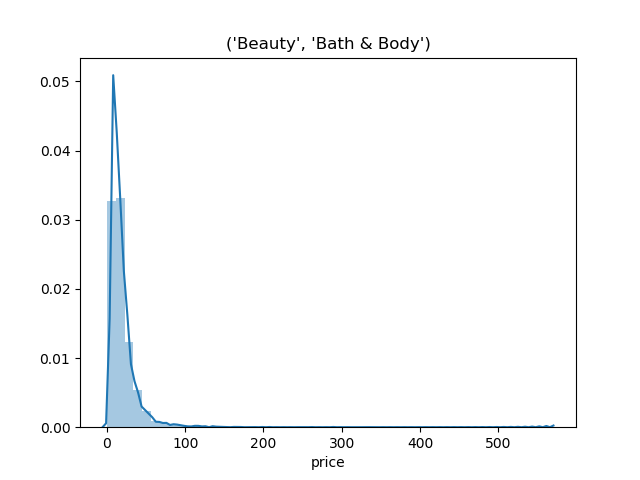

('Beauty', 'Fragrance') 

count    24294.000000
mean        23.801062
std         21.206903
min          0.000000
25%         12.000000
50%         18.000000
75%         29.750000
max        569.000000
Name: price, dtype: float64


/Users/Yuki_U/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


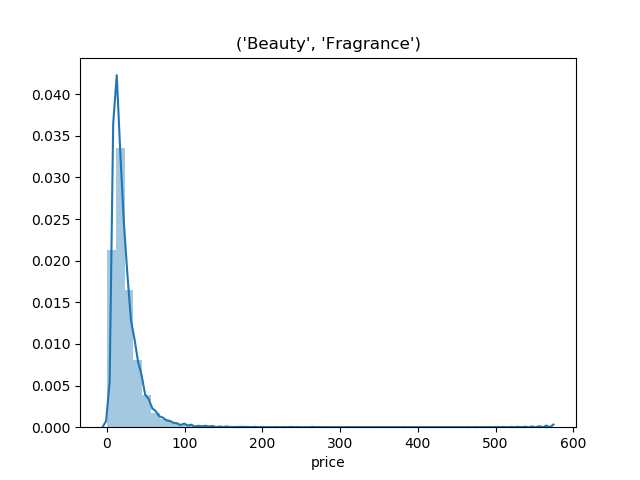

('Beauty', 'Hair Care') 

count    7770.000000
mean       19.374646
std        16.218518
min         0.000000
25%        10.000000
50%        15.000000
75%        23.000000
max       239.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


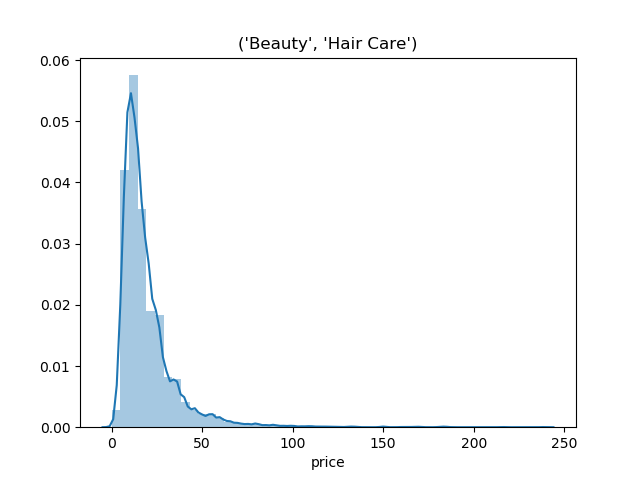

('Beauty', 'Makeup') 

count    124624.000000
mean         18.686176
std          20.853202
min           0.000000
25%          10.000000
50%          15.000000
75%          22.000000
max        2000.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


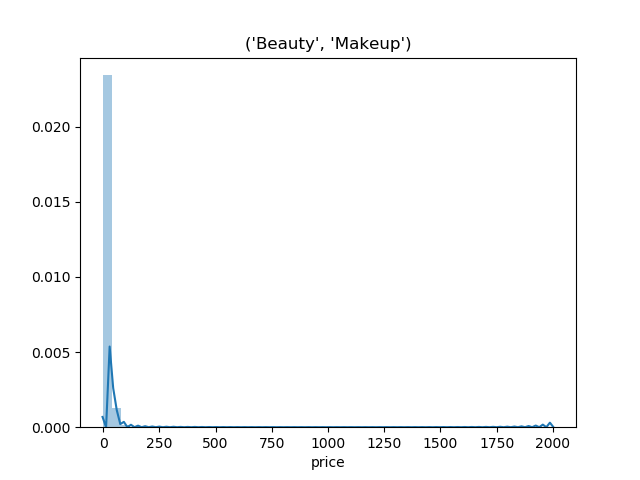

('Beauty', 'Other') 

count    489.000000
mean      22.952965
std       32.192490
min        3.000000
25%        8.000000
50%       14.000000
75%       25.000000
max      259.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


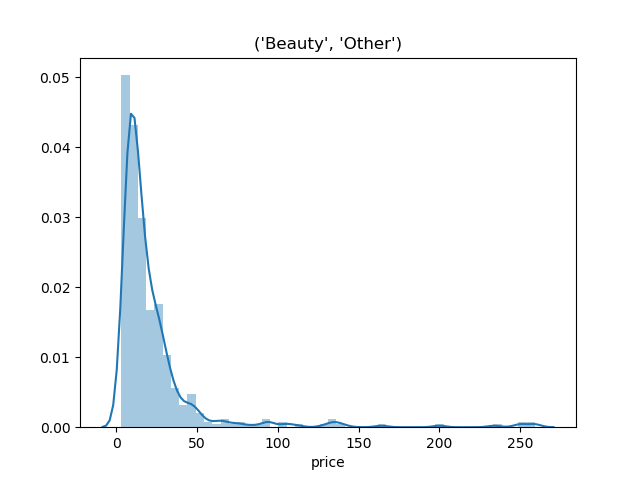

('Beauty', 'Skin Care') 

count    29838.000000
mean        20.497721
std         24.361659
min          0.000000
25%         10.000000
50%         14.000000
75%         24.000000
max        894.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


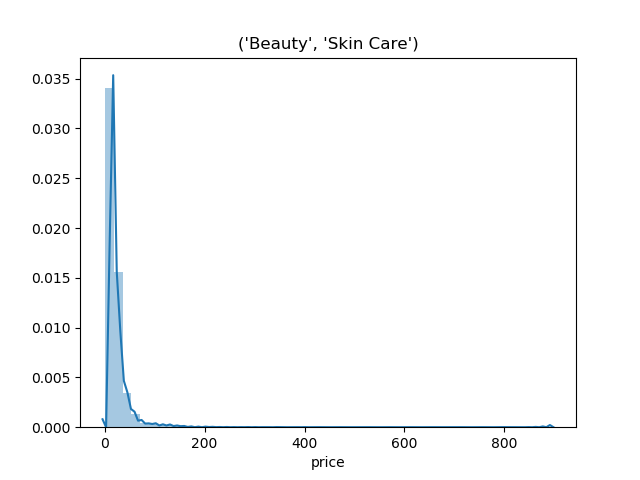

('Beauty', 'Tools & Accessories') 

count    13055.000000
mean        19.907468
std         22.013234
min          0.000000
25%          9.000000
50%         14.000000
75%         22.000000
max        375.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Electronics', 'Cameras & Photography') 

count    3976.000000
mean       71.343813
std        96.705241
min         0.000000
25%        19.000000
50%        40.000000
75%        75.000000
max      1056.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


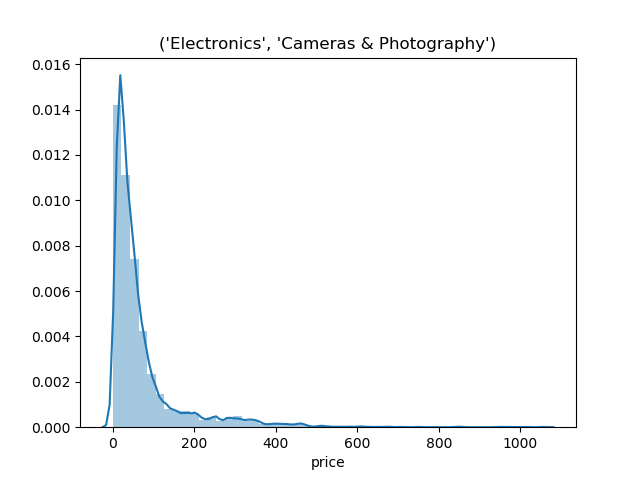

('Electronics', 'Car Audio, Video & GPS') 

count    516.000000
mean      37.874031
std       39.331521
min        3.000000
25%       15.000000
50%       25.000000
75%       45.000000
max      309.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Electronics', 'Cell Phones & Accessories') 

count    53290.000000
mean        30.142278
std         62.938841
min          0.000000
25%          8.000000
50%         11.000000
75%         20.000000
max       1909.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


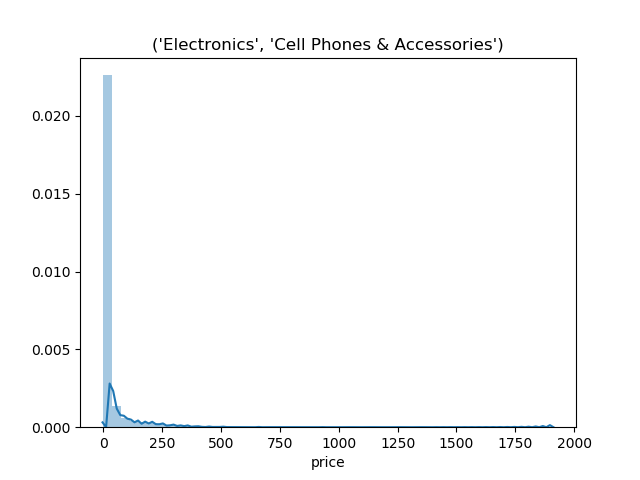

('Electronics', 'Computers & Tablets') 

count    7439.000000
mean       87.887754
std       138.997975
min         0.000000
25%        19.000000
50%        40.000000
75%        97.000000
max      1900.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


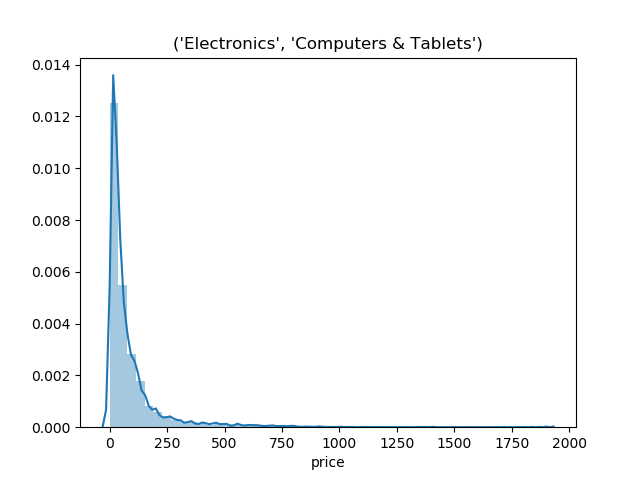

('Electronics', 'Media') 

count    11602.000000
mean        14.599293
std         13.442006
min          0.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        304.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Electronics', 'Other') 

count    773.000000
mean      37.294955
std       47.039157
min        3.000000
25%       12.000000
50%       21.000000
75%       43.000000
max      415.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


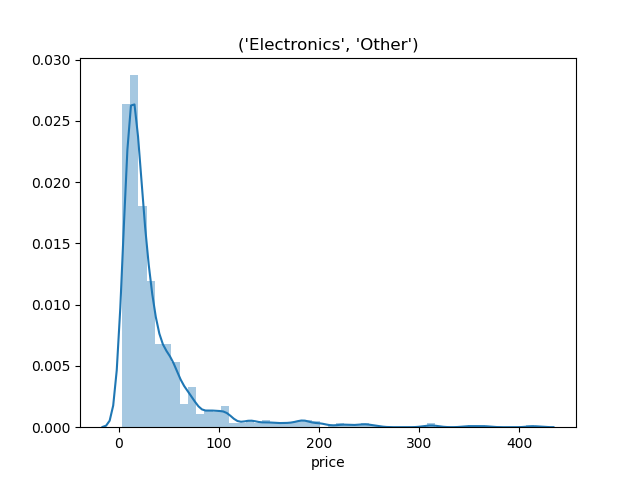

('Electronics', 'TV, Audio & Surveillance') 

count    9123.000000
mean       44.159542
std        49.431791
min         0.000000
25%        14.000000
50%        26.000000
75%        59.000000
max      1250.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Electronics', 'Video Games & Consoles') 

count    35971.000000
mean        32.001501
std         45.042052
min          0.000000
25%         11.000000
50%         19.000000
75%         34.000000
max       1254.000000
Name: price, dtype: float64


/Users/Yuki_U/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


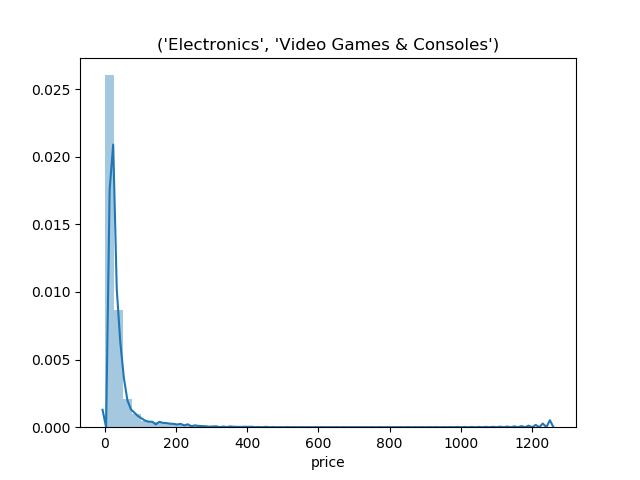

('Handmade', 'Accessories') 

count    5955.000000
mean       19.285978
std        30.087025
min         0.000000
25%         6.000000
50%        10.000000
75%        20.000000
max       906.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Art') 

count    656.000000
mean      14.748476
std       16.272747
min        0.000000
25%        6.000000
50%       10.000000
75%       18.000000
max      190.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


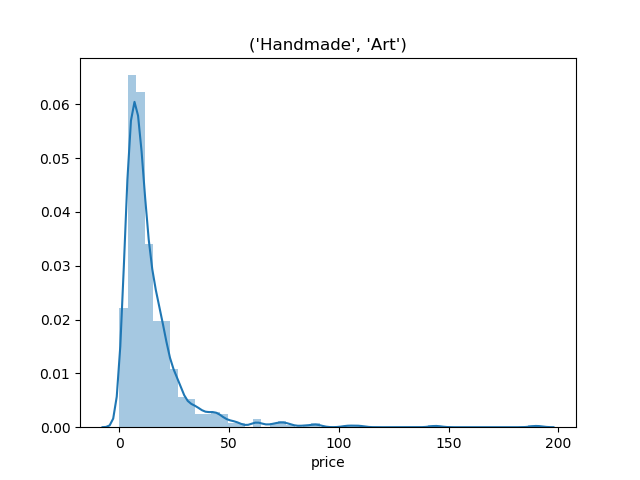

('Handmade', 'Bags and Purses') 

count    3175.00000
mean       36.16315
std        51.85437
min         0.00000
25%        15.00000
50%        24.00000
75%        43.00000
max      1750.00000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Books and Zines') 

count     46.00000
mean      14.23913
std       17.11164
min        3.00000
25%        7.00000
50%       10.00000
75%       18.75000
max      115.00000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Candles') 

count    64.000000
mean     21.734375
std      19.301486
min       3.000000
25%      10.000000
50%      16.000000
75%      24.250000
max      95.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


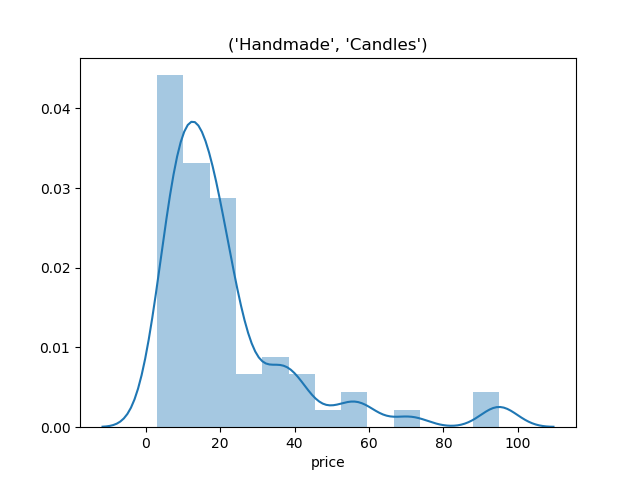

('Handmade', 'Ceramics and Pottery') 

count    57.000000
mean     20.280702
std      15.337576
min       3.000000
25%       9.000000
50%      15.000000
75%      27.000000
max      66.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Children') 

count    1242.000000
mean       12.664251
std        13.630351
min         3.000000
25%         7.000000
50%         9.000000
75%        13.000000
max       175.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


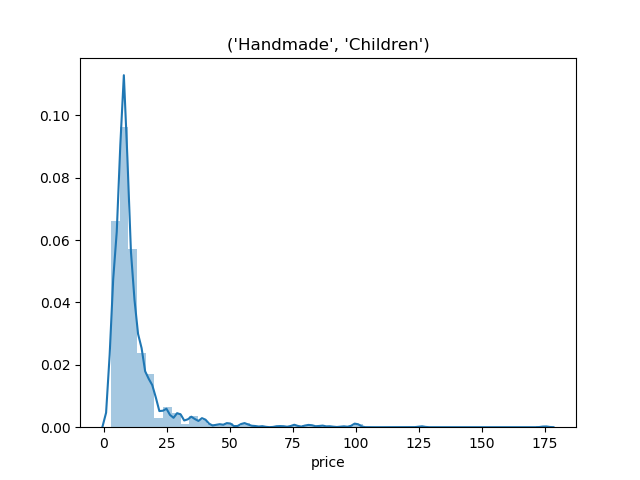

('Handmade', 'Clothing') 

count    5638.000000
mean       18.883469
std        18.507350
min         3.000000
25%        10.000000
50%        15.000000
75%        22.000000
max       580.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Crochet') 

count    234.000000
mean      19.068376
std       23.633005
min        4.000000
25%        9.000000
50%       14.000000
75%       19.000000
max      230.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


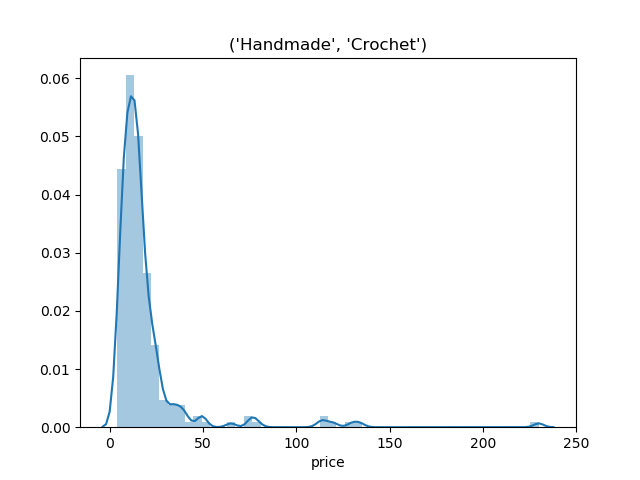

('Handmade', 'Dolls and Miniatures') 

count     49.000000
mean      27.469388
std       28.465697
min        5.000000
25%       10.000000
50%       15.000000
75%       38.000000
max      129.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


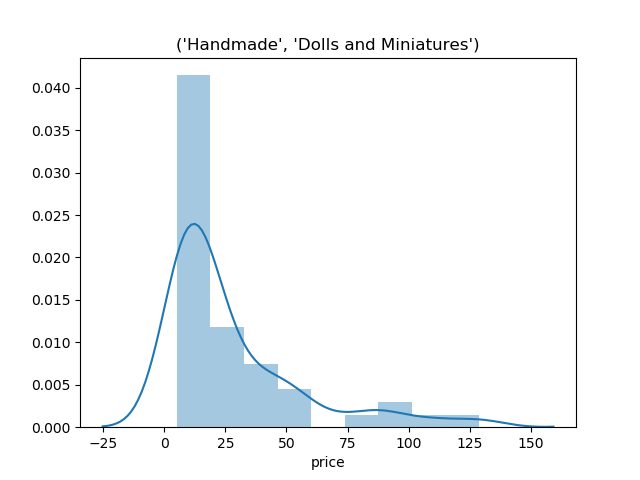

('Handmade', 'Furniture') 

count     3.000000
mean     11.666667
std       1.527525
min      10.000000
25%      11.000000
50%      12.000000
75%      12.500000
max      13.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


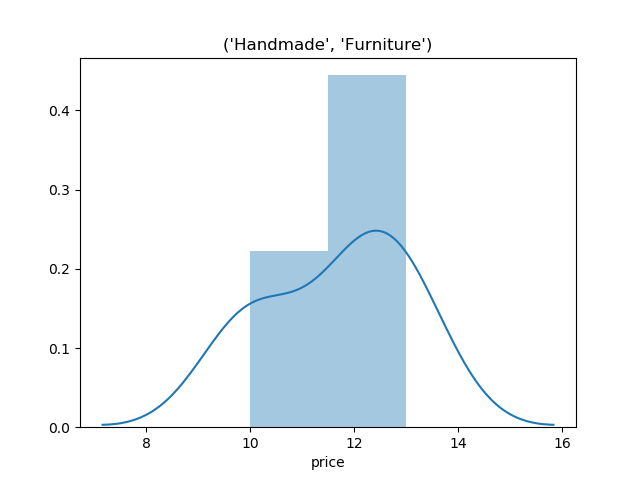

('Handmade', 'Geekery') 

count    110.000000
mean      11.990909
std        7.570459
min        4.000000
25%        7.000000
50%       10.000000
75%       15.000000
max       55.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Glass') 

count    592.000000
mean      18.771959
std       14.590416
min        3.000000
25%       11.000000
50%       15.000000
75%       22.000000
max      180.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Holidays') 

count    325.000000
mean      15.901538
std       10.334655
min        3.000000
25%        9.000000
50%       14.000000
75%       20.000000
max       79.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Housewares') 

count    431.000000
mean      17.273782
std       13.735685
min        3.000000
25%       10.000000
50%       14.000000
75%       20.000000
max      115.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


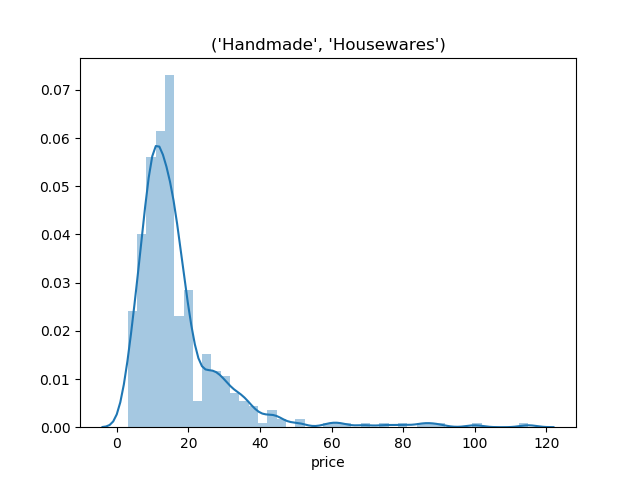

('Handmade', 'Jewelry') 

count    2399.000000
mean       12.550229
std        27.005696
min         3.000000
25%         4.000000
50%         7.000000
75%        12.000000
max       435.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Knitting') 

count    163.000000
mean      21.766871
std       19.764218
min        0.000000
25%       11.500000
50%       16.000000
75%       26.000000
max      155.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Music') 

count    867.000000
mean      21.885813
std       24.253989
min        0.000000
25%       10.000000
50%       16.000000
75%       24.000000
max      448.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


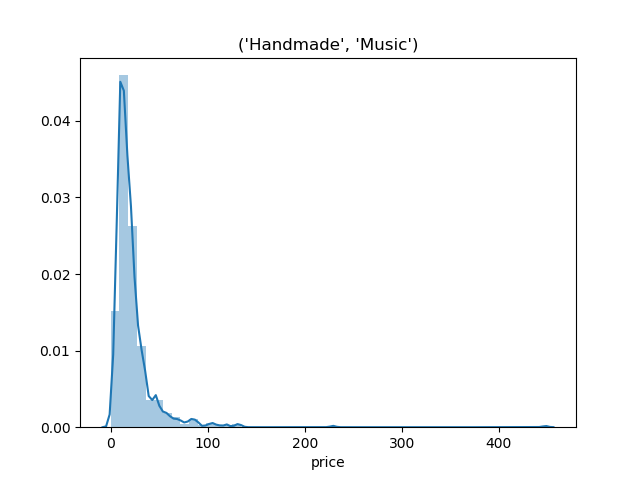

('Handmade', 'Needlecraft') 

count    271.000000
mean      15.298893
std       21.415016
min        0.000000
25%        8.000000
50%       10.000000
75%       16.000000
max      275.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Other') 

count    373.00000
mean      14.41555
std       15.51158
min        3.00000
25%        6.00000
50%       10.00000
75%       16.00000
max      129.00000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


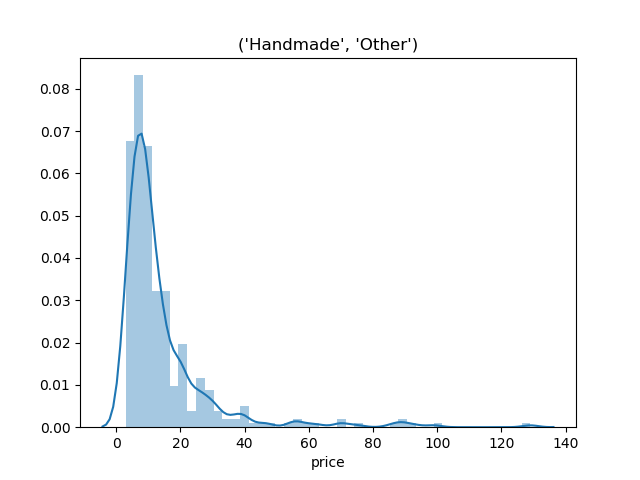

('Handmade', 'Others') 

count    309.000000
mean      15.006472
std       12.745509
min        3.000000
25%        7.000000
50%       12.000000
75%       17.000000
max       77.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


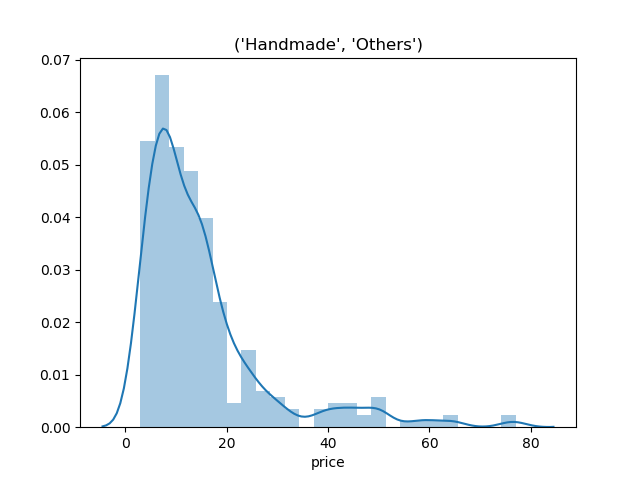

('Handmade', 'Paper Goods') 

count    6208.000000
mean       10.774323
std        18.739069
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max       334.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Patterns') 

count    202.000000
mean      22.485149
std       32.554620
min        3.000000
25%        8.250000
50%       14.000000
75%       23.000000
max      330.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Pets') 

count    261.000000
mean      17.785441
std       16.245708
min        3.000000
25%        8.000000
50%       14.000000
75%       21.000000
max      165.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


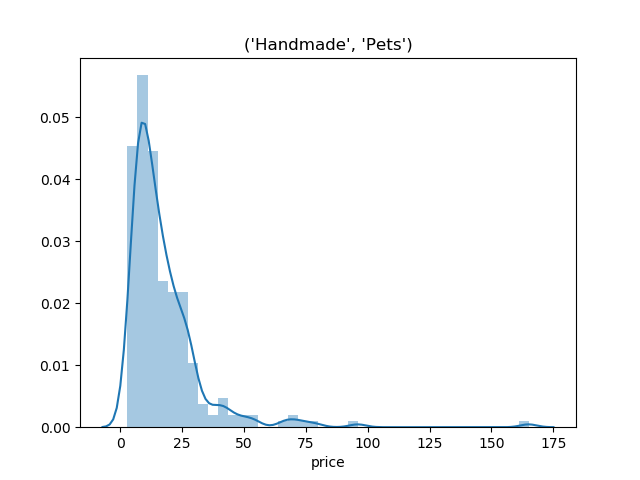

('Handmade', 'Quilts') 

count    31.000000
mean     12.258065
std      12.143497
min       3.000000
25%       5.000000
50%       8.000000
75%      15.500000
max      59.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Toys') 

count    449.000000
mean      13.719376
std       11.477914
min        3.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      150.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


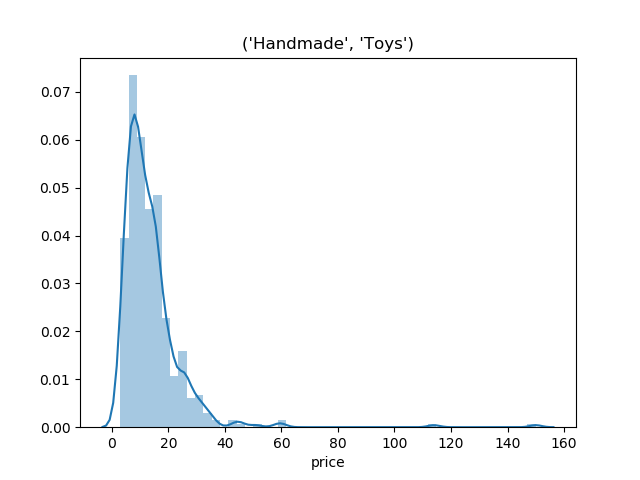

('Handmade', 'Weddings') 

count    611.000000
mean      20.160393
std       23.592312
min        3.000000
25%       10.000000
50%       14.000000
75%       22.000000
max      280.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Handmade', 'Woodworking') 

count    121.000000
mean      21.818182
std       17.020576
min        3.000000
25%       11.000000
50%       18.000000
75%       26.000000
max      120.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


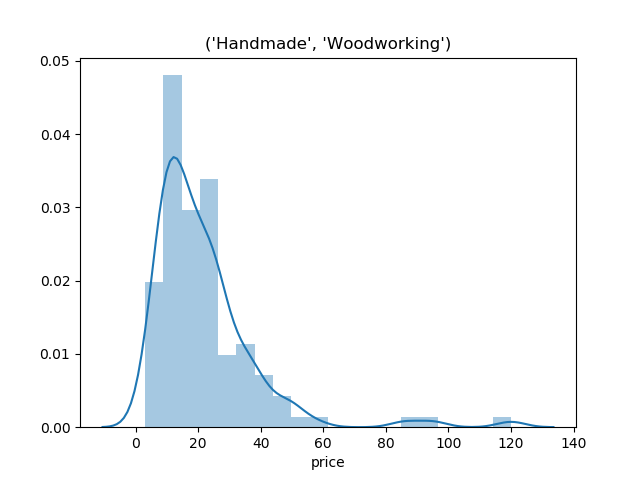

('Home', 'Artwork') 

count    1264.000000
mean       13.996440
std        18.344492
min         0.000000
25%         5.000000
50%        10.000000
75%        16.000000
max       300.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Home', 'Bath') 

count    1192.000000
mean       17.280201
std        12.131051
min         3.000000
25%        10.000000
50%        14.000000
75%        21.000000
max       210.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


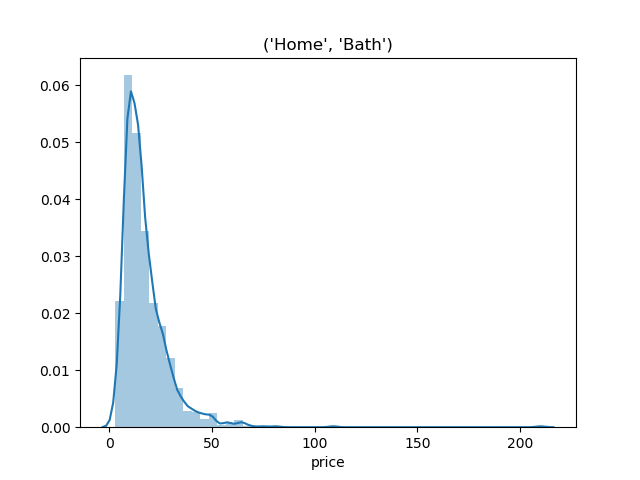

('Home', 'Bedding') 

count    4229.000000
mean       30.688815
std        24.065881
min         0.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       250.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Home', 'Cleaning Supplies') 

count    2367.000000
mean       23.198141
std        14.776585
min         0.000000
25%        14.000000
50%        20.000000
75%        28.000000
max       171.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


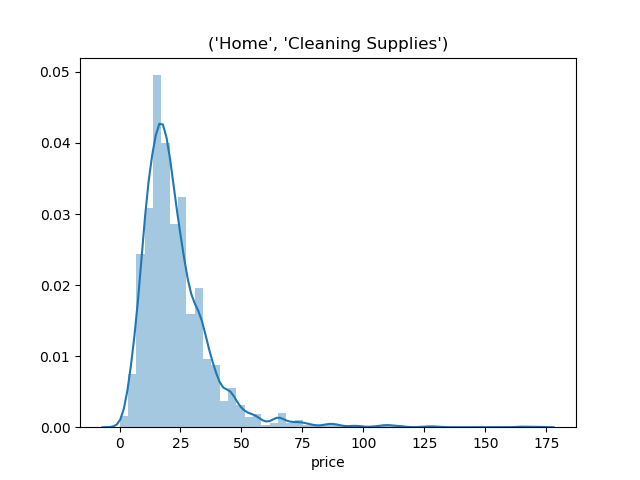

('Home', 'Furniture') 

count    166.000000
mean      34.849398
std       39.081208
min        0.000000
25%       14.000000
50%       26.000000
75%       40.000000
max      400.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Home', 'Home Appliances') 

count    2587.000000
mean       37.798222
std        47.862399
min         0.000000
25%        16.000000
50%        24.000000
75%        38.000000
max       640.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


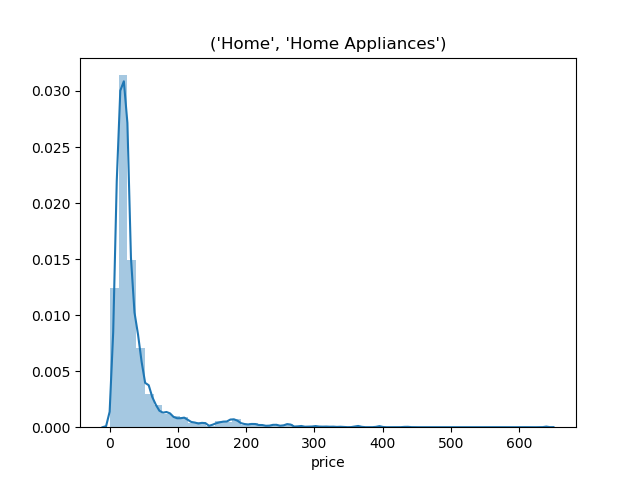

('Home', 'Home Décor') 

count    25188.000000
mean        21.566301
std         20.757917
min          0.000000
25%         11.000000
50%         16.000000
75%         26.000000
max        848.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Home', "Kids' Home Store") 

count    675.000000
mean      18.114074
std       14.834008
min        0.000000
25%       10.000000
50%       15.000000
75%       21.000000
max      169.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


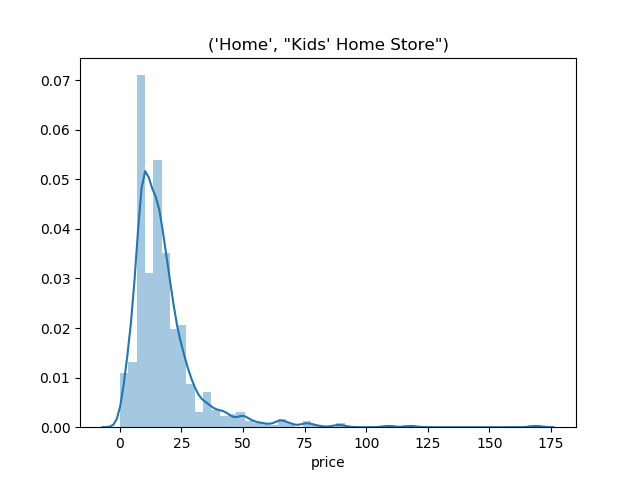

('Home', 'Kitchen & Dining') 

count    21954.000000
mean        28.625444
std         26.595847
min          0.000000
25%         14.000000
50%         21.000000
75%         35.000000
max        540.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Home', 'Other') 

count    503.000000
mean      22.210736
std       29.118718
min        0.000000
25%       10.000000
50%       15.000000
75%       25.000000
max      375.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


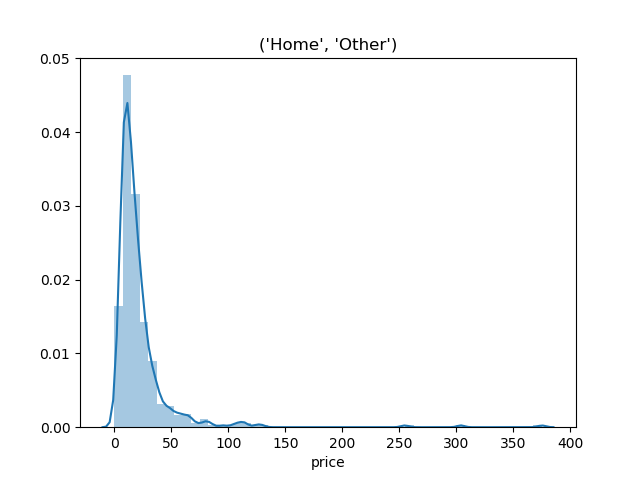

('Home', 'Seasonal Décor') 

count    4867.000000
mean       18.896035
std        17.439104
min         0.000000
25%        10.000000
50%        14.000000
75%        22.000000
max       365.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Home', 'Storage & Organization') 

count    2879.000000
mean       17.975339
std        13.802806
min         0.000000
25%        10.000000
50%        14.000000
75%        21.000000
max       156.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


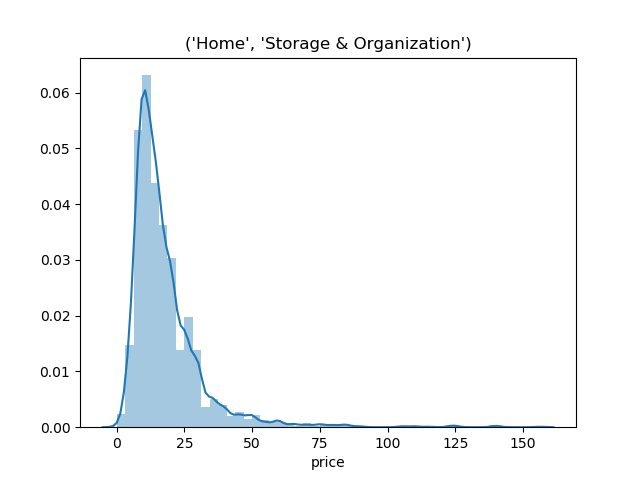

('Kids', 'Bathing & Skin Care') 

count    744.000000
mean      15.922043
std       10.122366
min        3.000000
25%        9.000000
50%       13.000000
75%       20.000000
max       96.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Boys (4+)') 

count    14747.000000
mean        27.849325
std         29.906969
min          0.000000
25%         12.000000
50%         18.000000
75%         31.000000
max        366.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


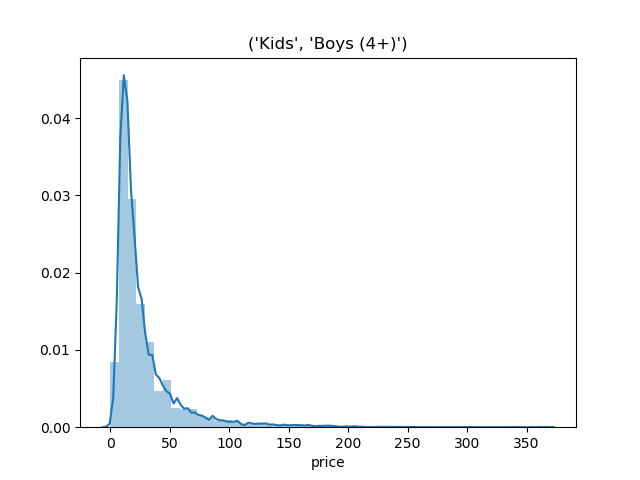

('Kids', 'Boys 0-24 Mos') 

count    15372.000000
mean        17.000618
std         14.213401
min          0.000000
25%          9.000000
50%         14.000000
75%         20.000000
max        480.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Boys 2T-5T') 

count    14382.000000
mean        18.791267
std         14.189807
min          0.000000
25%         10.000000
50%         15.000000
75%         23.000000
max        331.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Car Seats & Accessories') 

count    920.000000
mean      26.528261
std       40.159005
min        3.000000
25%       10.000000
50%       15.000000
75%       27.000000
max      650.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Diapering') 

count    3559.000000
mean       31.400112
std        35.843416
min         0.000000
25%        14.000000
50%        21.000000
75%        35.000000
max       809.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Feeding') 

count    4519.000000
mean       19.260013
std        22.706138
min         3.000000
25%         8.000000
50%        12.000000
75%        21.000000
max       383.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


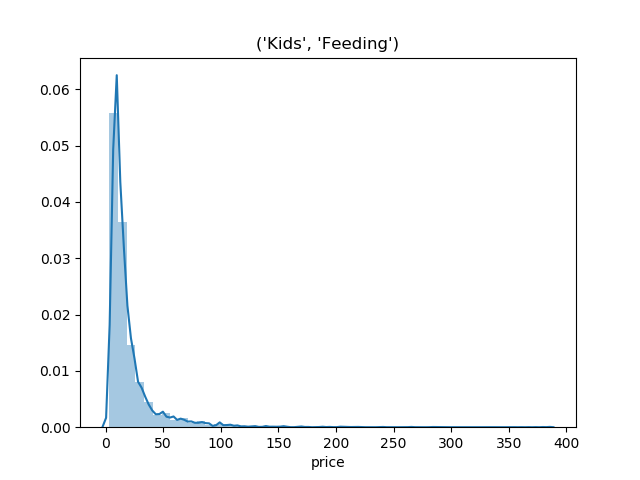

('Kids', 'Gear') 

count    2999.000000
mean       30.319106
std        31.721571
min         0.000000
25%        14.000000
50%        20.000000
75%        32.000000
max       366.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Girls (4+)') 

count    15243.000000
mean        18.552418
std         15.375467
min          0.000000
25%         10.000000
50%         14.000000
75%         22.000000
max        356.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


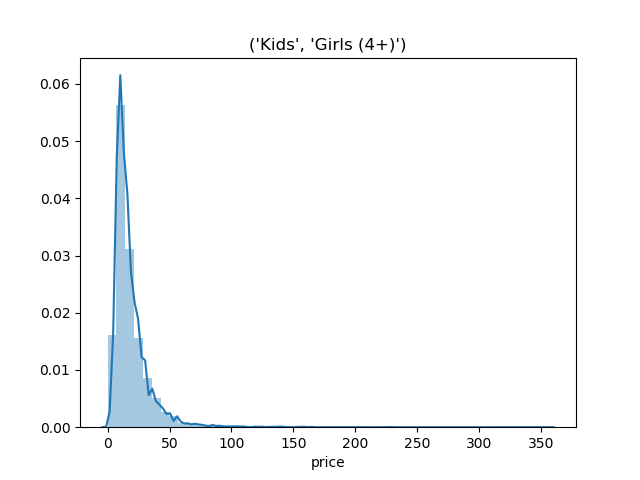

('Kids', 'Girls 0-24 Mos') 

count    17878.000000
mean        15.433634
std         12.126550
min          0.000000
25%          9.000000
50%         12.000000
75%         18.000000
max        300.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


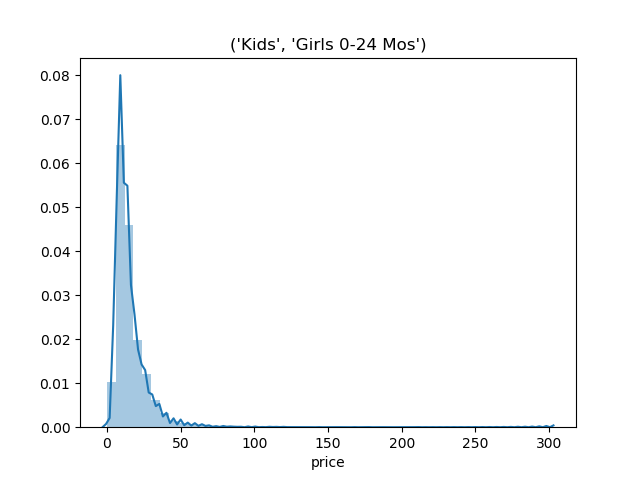

('Kids', 'Girls 2T-5T') 

count    18448.000000
mean        17.967639
std         13.554833
min          0.000000
25%         10.000000
50%         14.000000
75%         22.000000
max        300.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Health & Baby Care') 

count    547.000000
mean      16.263254
std       14.257707
min        0.000000
25%       10.000000
50%       13.000000
75%       18.500000
max      140.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Nursery') 

count    1678.000000
mean       24.652563
std        25.779609
min         0.000000
25%        11.000000
50%        16.000000
75%        27.000000
max       250.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Other') 

count    1038.000000
mean       21.717726
std        25.512647
min         3.000000
25%        10.000000
50%        15.000000
75%        24.750000
max       341.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


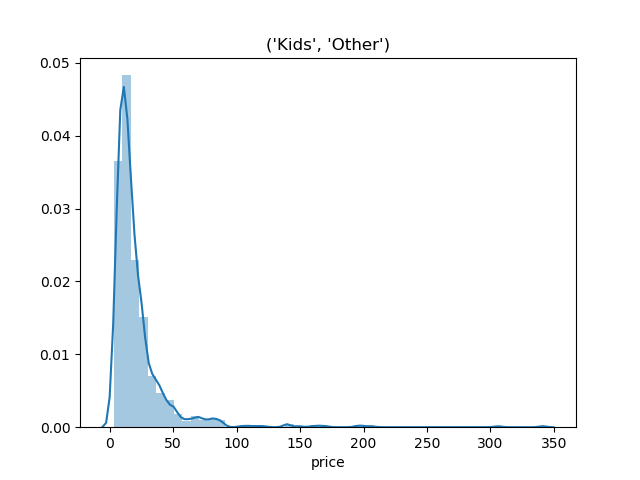

('Kids', 'Potty Training') 

count    155.000000
mean      15.754839
std        7.841235
min        5.000000
25%       10.000000
50%       14.000000
75%       19.000000
max       44.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Pregnancy & Maternity') 

count    874.000000
mean      20.640732
std       21.809736
min        3.000000
25%       10.000000
50%       15.000000
75%       25.000000
max      365.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Safety') 

count    400.000000
mean      36.797500
std       41.840448
min        0.000000
25%       11.000000
50%       19.000000
75%       45.250000
max      215.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


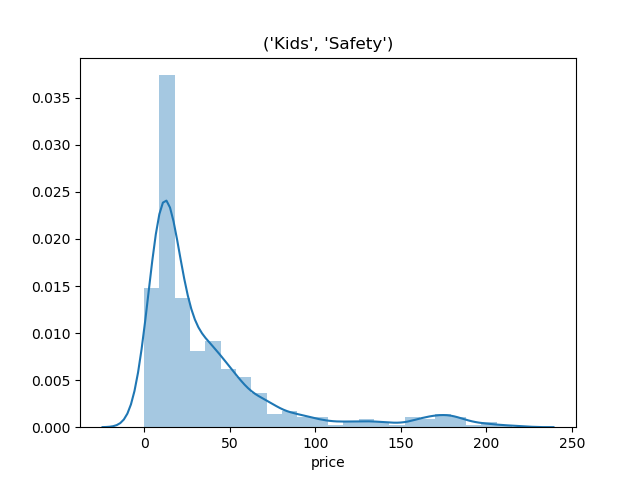

('Kids', 'Strollers') 

count    477.000000
mean      67.280922
std       84.207606
min        3.000000
25%       18.000000
50%       36.000000
75%       76.000000
max      590.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Kids', 'Toys') 

count    57709.000000
mean        21.582821
std         25.774215
min          0.000000
25%          9.000000
50%         14.000000
75%         24.000000
max        765.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


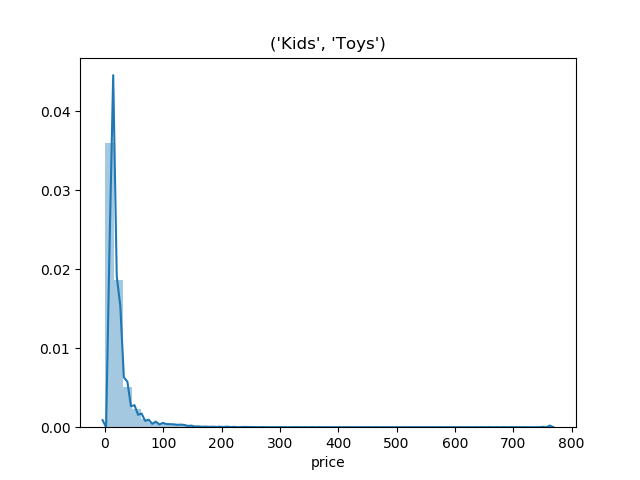

('Men', 'Athletic Apparel') 

count    10926.000000
mean        24.125664
std         21.396868
min          0.000000
25%         13.000000
50%         19.000000
75%         30.000000
max        855.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Blazers & Sport Coats') 

count    69.000000
mean     27.463768
std      16.416974
min       3.000000
25%      16.000000
50%      24.000000
75%      34.000000
max      95.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


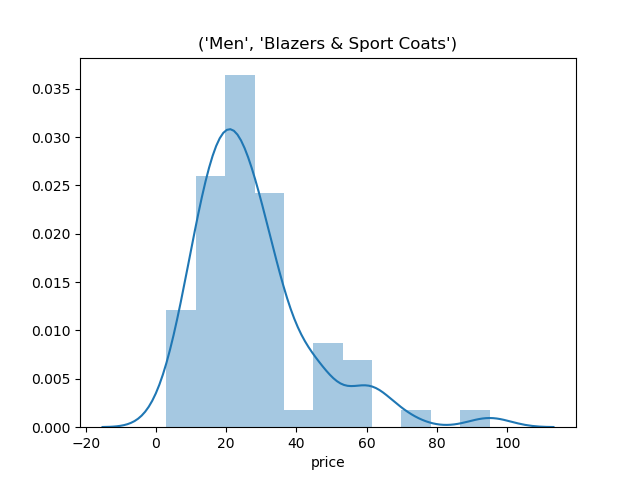

('Men', 'Coats & Jackets') 

count    3304.00000
mean       34.56931
std        28.24018
min         0.00000
25%        19.00000
50%        26.00000
75%        41.00000
max       380.00000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


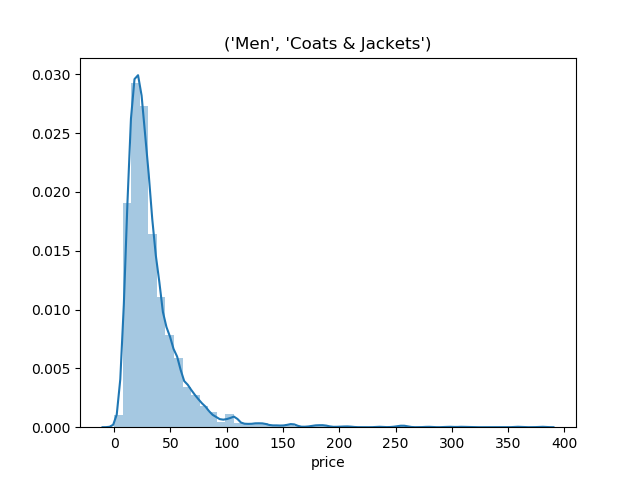

('Men', 'Jeans') 

count    3792.000000
mean       28.494989
std        23.239137
min         0.000000
25%        15.000000
50%        21.000000
75%        35.000000
max       415.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', "Men's Accessories") 

count    18672.000000
mean        33.813919
std         45.054845
min          0.000000
25%         12.000000
50%         20.000000
75%         39.000000
max       1309.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


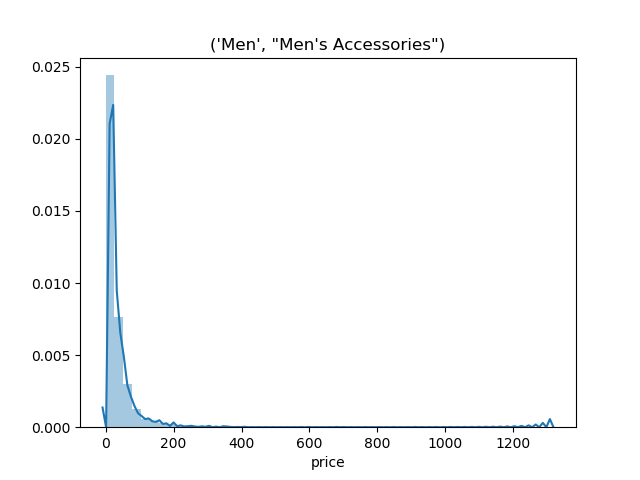

('Men', 'Other') 

count    871.000000
mean      23.180253
std       29.243699
min        0.000000
25%       10.000000
50%       16.000000
75%       25.000000
max      406.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Pants') 

count    906.000000
mean      19.592715
std       13.317986
min        0.000000
25%       12.000000
50%       16.000000
75%       22.000000
max      156.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Shoes') 

count    22798.000000
mean        61.688350
std         57.128254
min          0.000000
25%         26.000000
50%         44.000000
75%         76.000000
max        950.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


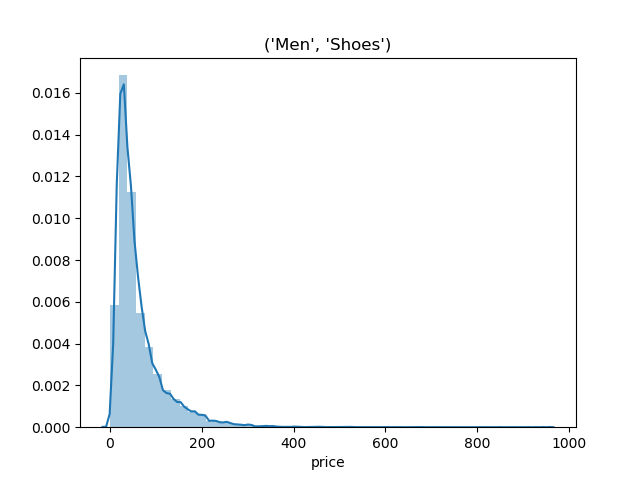

('Men', 'Shorts') 

count    1466.000000
mean       18.490450
std        15.437872
min         0.000000
25%        10.000000
50%        14.000000
75%        21.000000
max       250.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Suits') 

count     66.000000
mean      37.151515
std       26.221097
min        6.000000
25%       21.000000
50%       30.000000
75%       43.750000
max      175.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


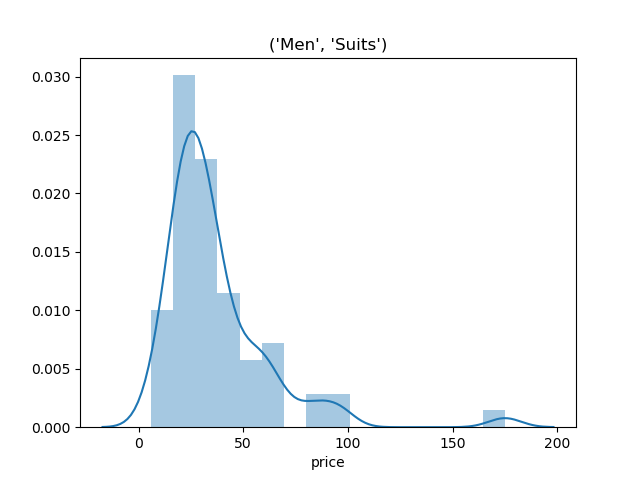

('Men', 'Sweaters') 

count    1440.000000
mean       21.229861
std        15.210109
min         3.000000
25%        14.000000
50%        18.000000
75%        25.000000
max       200.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Sweats & Hoodies') 

count    8275.000000
mean       27.631903
std        24.213459
min         0.000000
25%        15.000000
50%        21.000000
75%        31.000000
max       426.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Swimwear') 

count    504.000000
mean      15.980159
std        8.423413
min        3.000000
25%       10.000000
50%       14.000000
75%       20.000000
max       70.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Men', 'Tops') 

count    20591.000000
mean        18.999442
std         17.318578
min          0.000000
25%         10.000000
50%         14.000000
75%         21.000000
max        375.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('NA', 'NA') 

count    6327.000000
mean       25.394658
std        34.114422
min         0.000000
25%        10.000000
50%        16.000000
75%        28.000000
max      1000.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


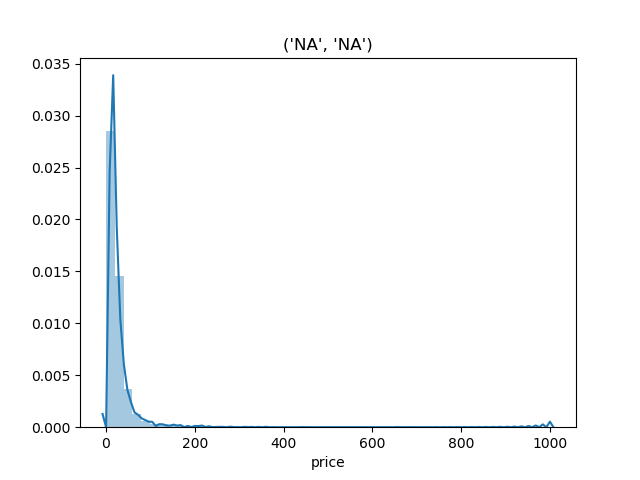

('Other', 'Automotive') 

count    2480.000000
mean       21.546774
std        31.613786
min         0.000000
25%         7.000000
50%        13.000000
75%        24.000000
max       765.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Other', 'Books') 

count    7794.000000
mean       16.194509
std        14.899919
min         0.000000
25%         8.000000
50%        11.000000
75%        18.000000
max       180.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


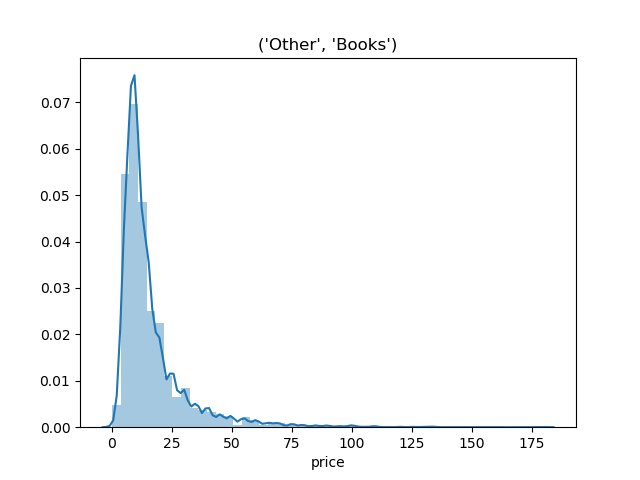

('Other', 'Daily & Travel items') 

count    11441.000000
mean        24.299187
std         32.214335
min          0.000000
25%         10.000000
50%         16.000000
75%         26.000000
max        840.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


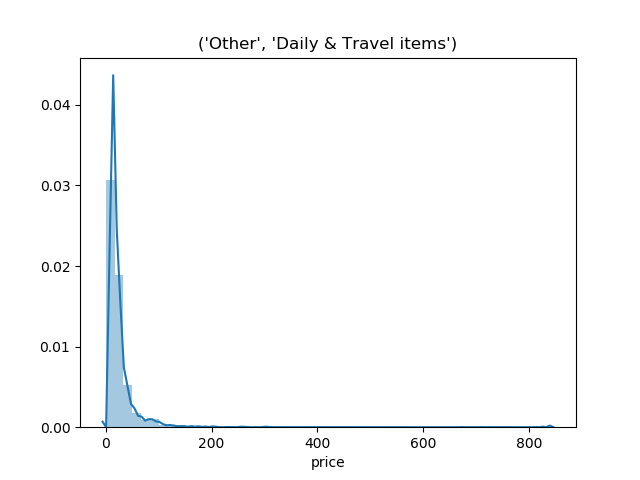

('Other', 'Magazines') 

count    219.000000
mean      12.200913
std        9.150415
min        3.000000
25%        7.000000
50%        9.000000
75%       15.000000
max       60.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Other', 'Musical instruments') 

count    1032.000000
mean       46.684109
std        60.310585
min         0.000000
25%        14.000000
50%        30.500000
75%        59.000000
max       900.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


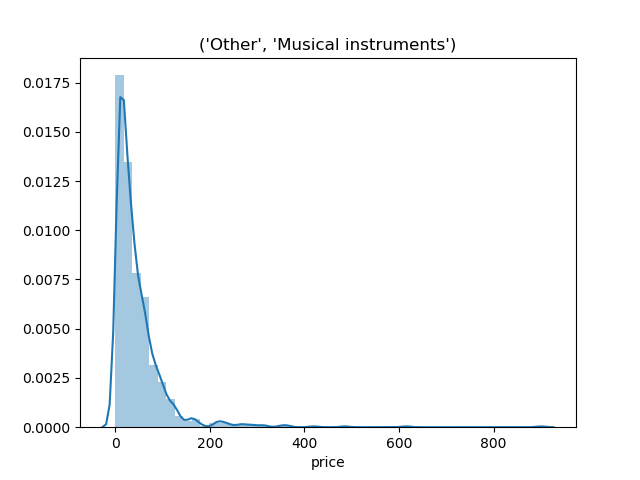

('Other', 'Office supplies') 

count    10492.00000
mean        16.70997
std         20.37537
min          0.00000
25%          7.00000
50%         11.00000
75%         19.00000
max        950.00000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


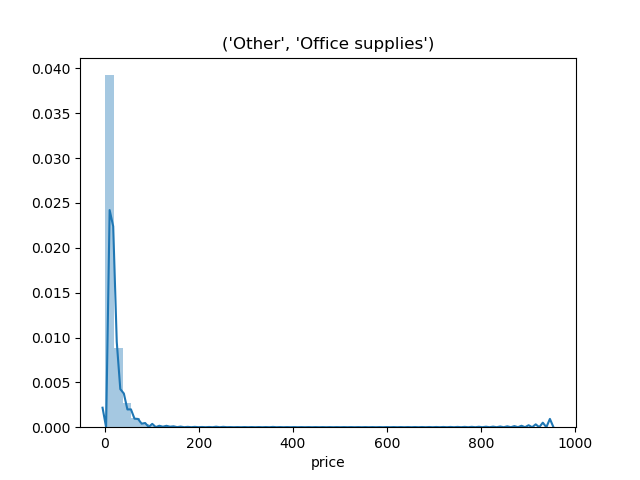

('Other', 'Other') 

count    7933.000000
mean       24.165511
std        41.811300
min         0.000000
25%         9.000000
50%        14.000000
75%        25.000000
max      1400.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Other', 'Pet Supplies') 

count    3960.000000
mean       17.223990
std        15.903411
min         0.000000
25%         9.000000
50%        12.000000
75%        20.000000
max       206.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


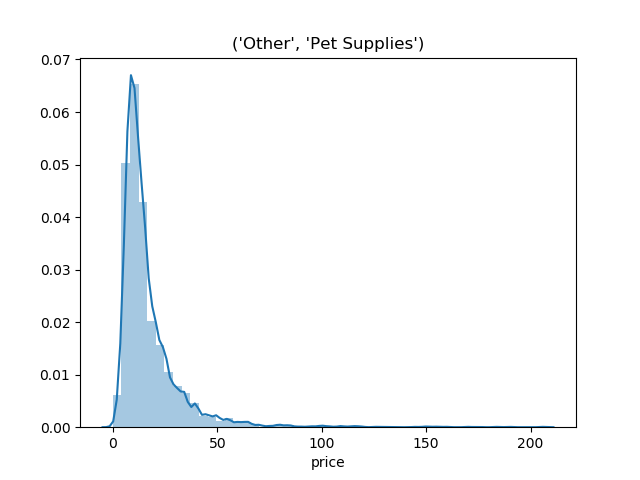

('Sports & Outdoors', 'Apparel') 

count    2918.000000
mean       16.386566
std        13.325440
min         3.000000
25%        10.000000
50%        13.000000
75%        19.000000
max       216.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


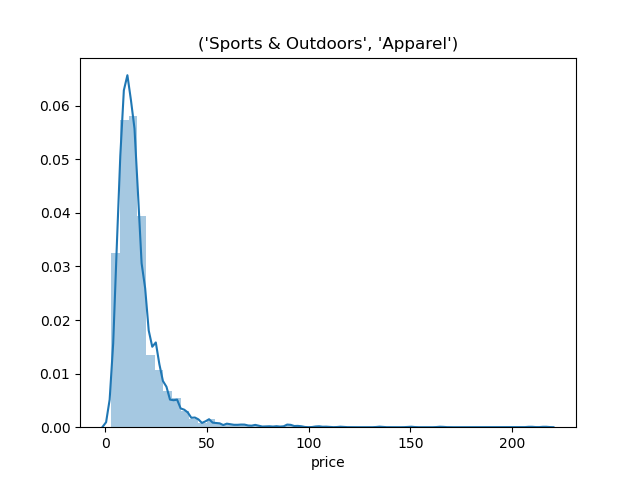

('Sports & Outdoors', 'Exercise') 

count    8007.000000
mean       30.008305
std        30.076698
min         0.000000
25%        12.000000
50%        19.000000
75%        35.000000
max       431.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


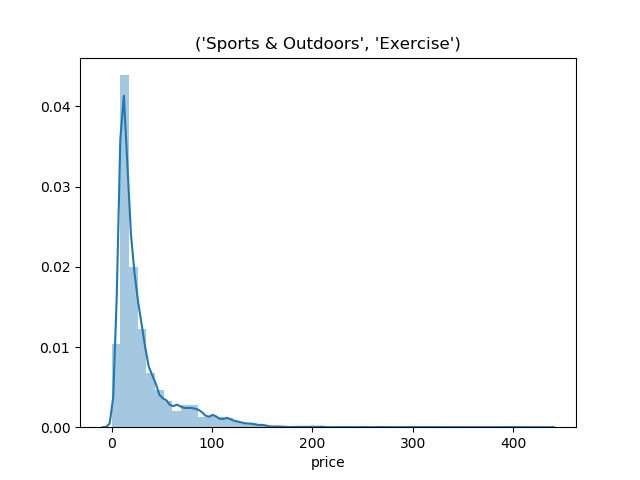

('Sports & Outdoors', 'Fan Shop') 

count    6272.000000
mean       17.717953
std        15.650056
min         0.000000
25%        10.000000
50%        14.500000
75%        20.000000
max       559.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Sports & Outdoors', 'Footwear') 

count    540.000000
mean      42.998148
std       35.750657
min        6.000000
25%       19.000000
50%       30.000000
75%       56.000000
max      226.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Sports & Outdoors', 'Golf') 

count    801.000000
mean      41.606742
std       56.257879
min        0.000000
25%       14.000000
50%       24.000000
75%       45.000000
max      575.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


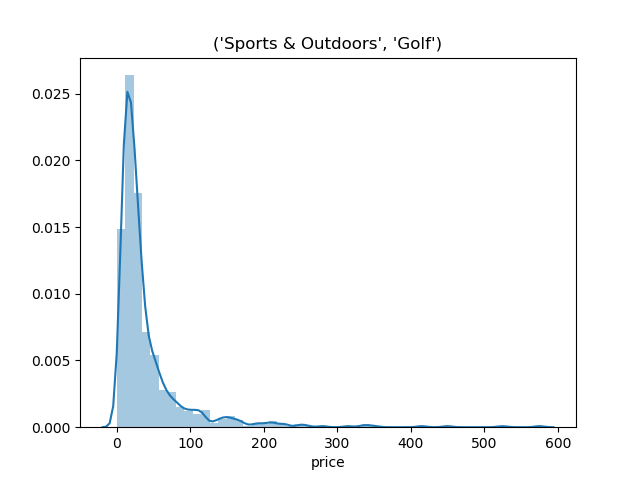

('Sports & Outdoors', 'Other') 

count    363.000000
mean      26.060606
std       37.042631
min        3.000000
25%       10.000000
50%       16.000000
75%       28.000000
max      360.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


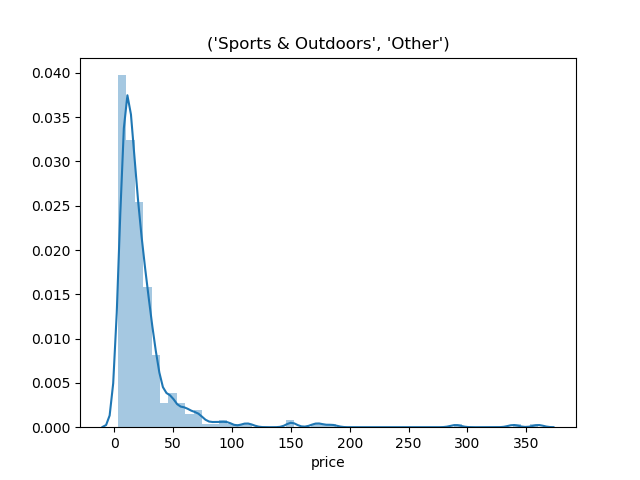

('Sports & Outdoors', 'Outdoors') 

count    4320.000000
mean       28.988426
std        35.794270
min         0.000000
25%        11.000000
50%        20.000000
75%        32.000000
max       915.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Sports & Outdoors', 'Team Sports') 

count    2121.000000
mean       26.677039
std        30.693707
min         0.000000
25%        12.000000
50%        18.000000
75%        30.000000
max       399.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Vintage & Collectibles', 'Accessories') 

count    2258.000000
mean       17.872453
std        24.002430
min         3.000000
25%         7.000000
50%        11.000000
75%        20.000000
max       675.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


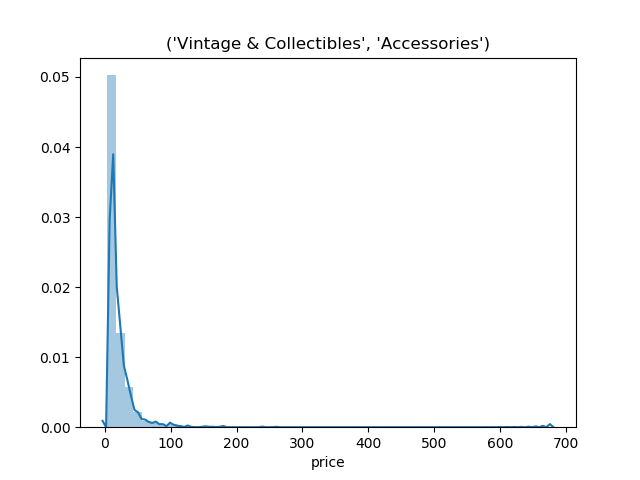

('Vintage & Collectibles', 'Antique') 

count    6093.000000
mean       24.739373
std        34.879419
min         3.000000
25%        10.000000
50%        16.000000
75%        26.000000
max       825.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


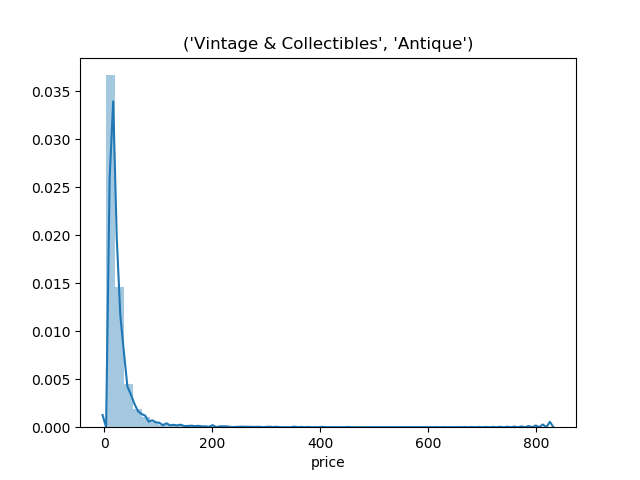

('Vintage & Collectibles', 'Bags and Purses') 

count    3163.000000
mean       87.515966
std       161.900997
min         0.000000
25%        16.000000
50%        32.000000
75%        76.000000
max      1709.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


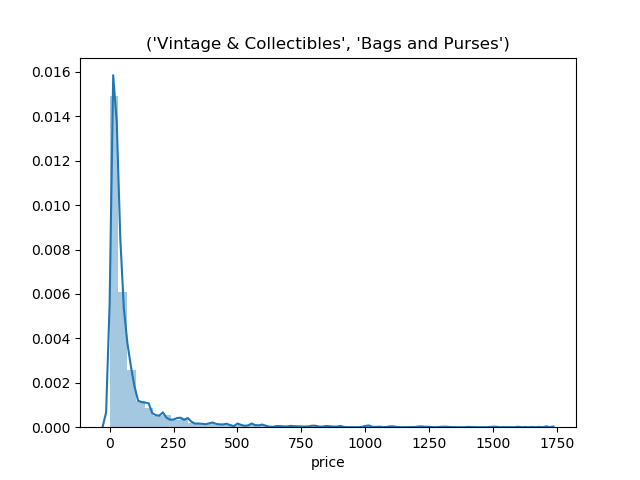

('Vintage & Collectibles', 'Book') 

count    1642.000000
mean       19.292326
std        22.330350
min         0.000000
25%         8.000000
50%        12.000000
75%        20.000000
max       285.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Vintage & Collectibles', 'Clothing') 

count    2692.000000
mean       19.904903
std        17.030365
min         3.000000
25%        10.000000
50%        15.000000
75%        24.000000
max       290.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


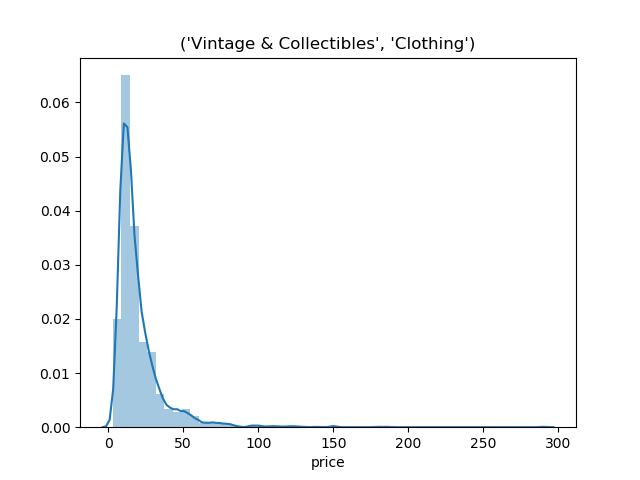

('Vintage & Collectibles', 'Collectibles') 

count    5811.000000
mean       24.341852
std        31.051399
min         3.000000
25%        11.000000
50%        16.000000
75%        26.000000
max      1050.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


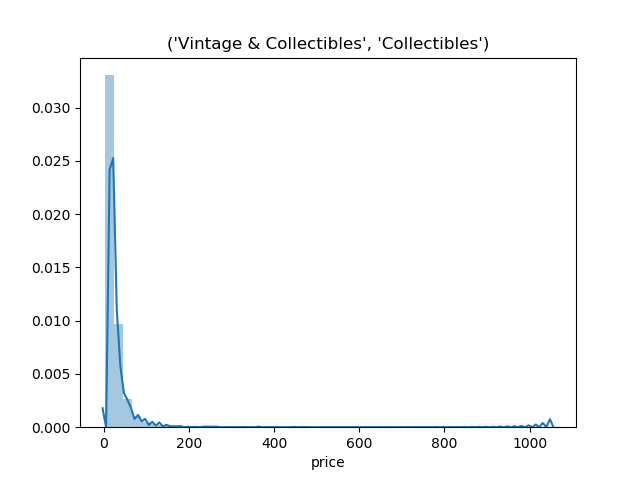

('Vintage & Collectibles', 'Electronics') 

count    2729.000000
mean       27.209234
std        29.766808
min         3.000000
25%        11.000000
50%        18.000000
75%        32.000000
max       350.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


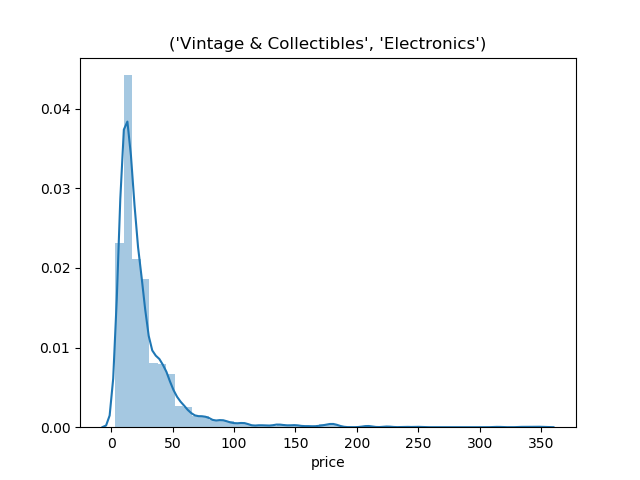

('Vintage & Collectibles', 'Furniture') 

count    10.000000
mean     20.300000
std      16.323466
min       4.000000
25%       9.000000
50%      15.000000
75%      25.750000
max      55.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


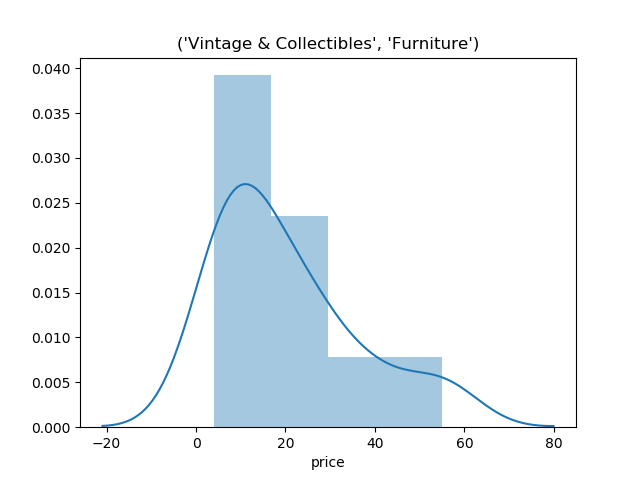

('Vintage & Collectibles', 'Home Decor') 

count    477.000000
mean      23.536688
std       22.006426
min        0.000000
25%       11.000000
50%       17.000000
75%       26.000000
max      175.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Vintage & Collectibles', 'Housewares') 

count    1732.000000
mean       27.016744
std        20.515969
min         3.000000
25%        15.000000
50%        22.000000
75%        33.000000
max       230.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


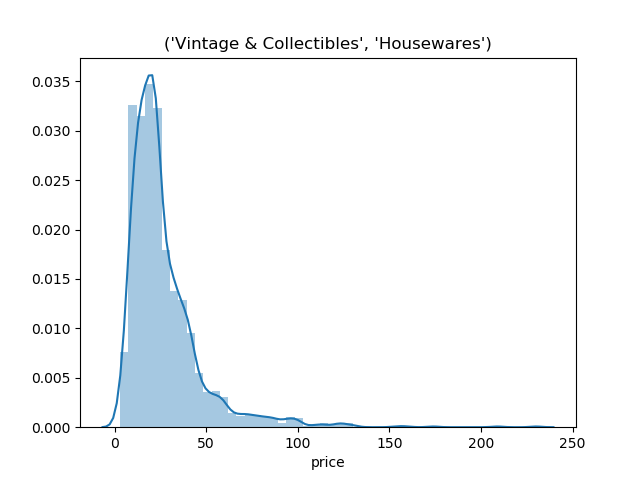

('Vintage & Collectibles', 'Jewelry') 

count    2527.000000
mean       29.166205
std        44.465365
min         0.000000
25%        10.000000
50%        17.000000
75%        30.000000
max       950.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


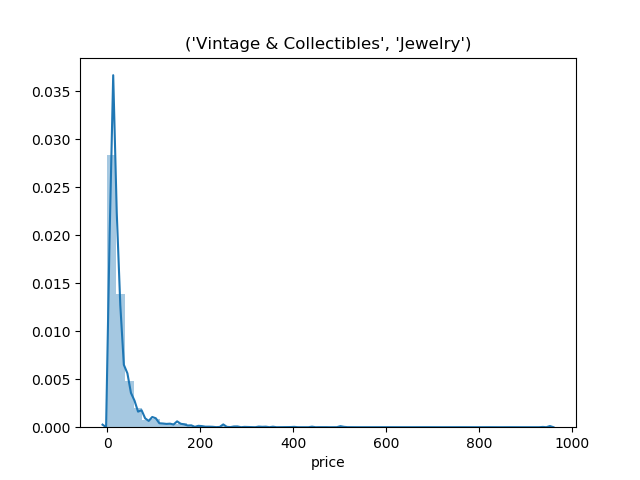

('Vintage & Collectibles', 'Other') 

count    410.000000
mean      20.180488
std       27.302643
min        3.000000
25%        8.000000
50%       14.000000
75%       24.000000
max      279.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


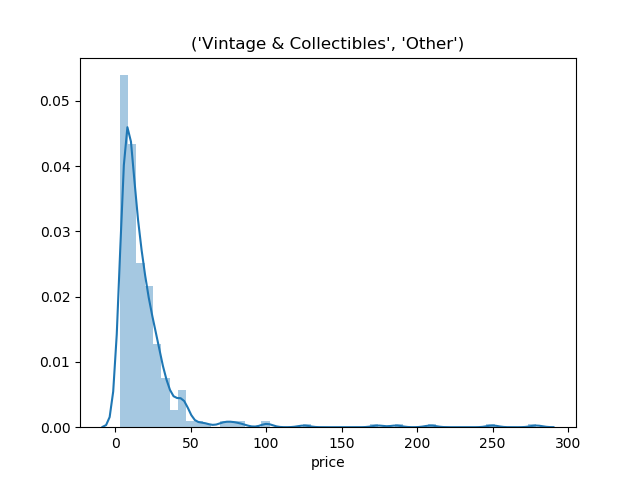

('Vintage & Collectibles', 'Paper Ephemera') 

count    165.000000
mean      20.648485
std       34.686717
min        3.000000
25%        8.000000
50%       11.000000
75%       25.000000
max      400.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


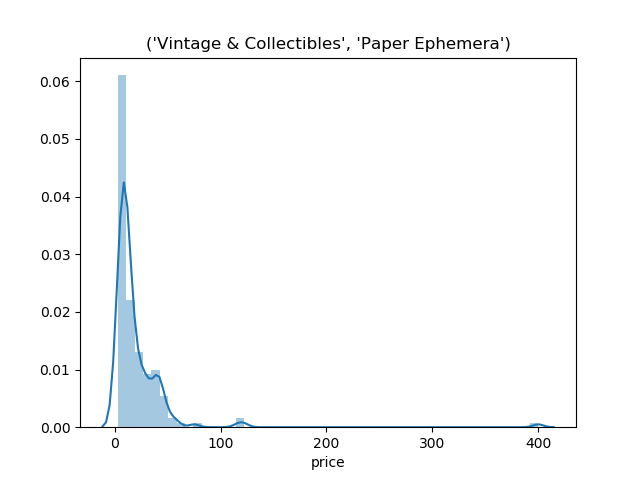

('Vintage & Collectibles', 'Serving') 

count    1886.000000
mean       25.797985
std        18.891257
min         3.000000
25%        16.000000
50%        22.000000
75%        28.000000
max       219.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Vintage & Collectibles', 'Supplies') 

count    1112.000000
mean       20.937050
std        19.703737
min         3.000000
25%        10.000000
50%        16.000000
75%        25.000000
max       226.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Vintage & Collectibles', 'Toy') 

count    7340.000000
mean       26.132425
std        32.081505
min         0.000000
25%        11.000000
50%        17.000000
75%        29.000000
max       775.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Vintage & Collectibles', 'Trading Cards') 

count    6483.000000
mean       14.788678
std        24.073401
min         0.000000
25%         4.000000
50%         8.000000
75%        16.000000
max       500.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Women', 'Athletic Apparel') 

count    123457.000000
mean         28.844614
std          24.120941
min           0.000000
25%          14.000000
50%          22.000000
75%          36.000000
max         798.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Women', 'Coats & Jackets') 

count    15087.000000
mean        34.041360
std         32.612217
min          0.000000
25%         16.000000
50%         25.000000
75%         41.000000
max       1009.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Women', 'Dresses') 

count    45758.000000
mean        29.445015
std         30.249015
min          0.000000
25%         13.000000
50%         20.000000
75%         36.000000
max        999.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>

('Women', 'Jeans') 

count    32338.000000
mean        25.885614
std         18.549074
min          0.000000
25%         14.000000
50%         20.000000
75%         31.000000
max        456.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


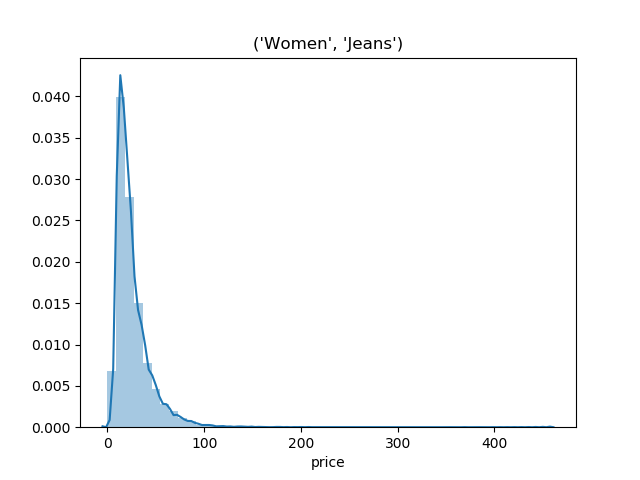

('Women', 'Jewelry') 

count    56837.000000
mean        28.058633
std         50.442636
min          0.000000
25%          8.000000
50%         14.000000
75%         30.000000
max       2004.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


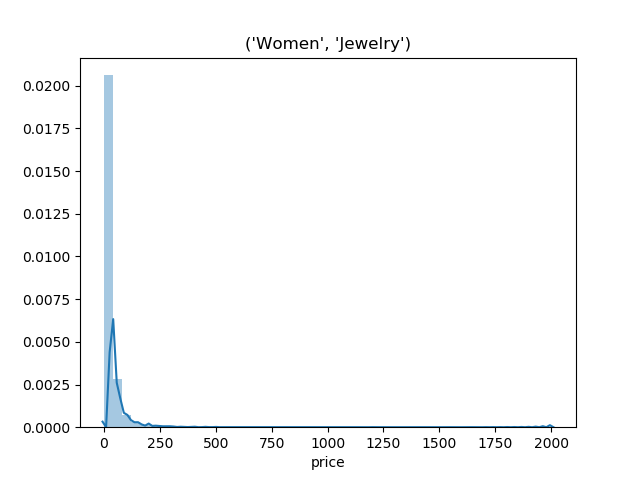

('Women', 'Maternity') 

count    3358.000000
mean       21.111971
std        16.517328
min         0.000000
25%        10.000000
50%        15.000000
75%        25.000000
max       190.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


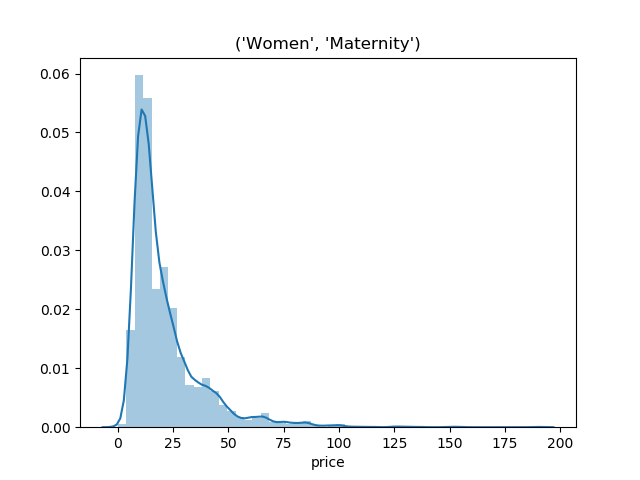

('Women', 'Other') 

count    7264.000000
mean       26.012665
std        34.919227
min         0.000000
25%        11.000000
50%        17.000000
75%        29.000000
max       700.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


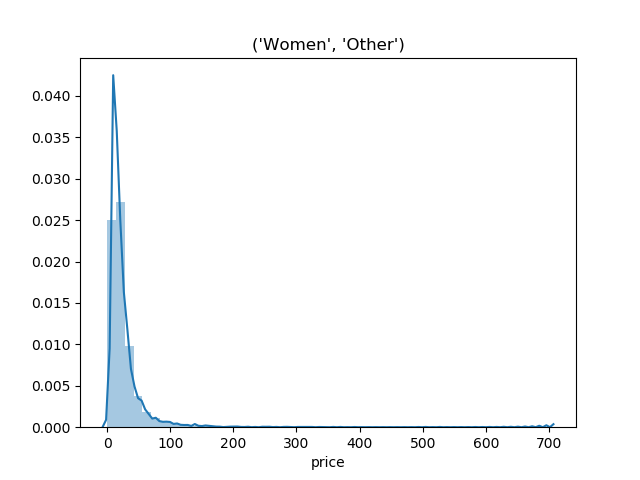

('Women', 'Pants') 

count    8408.000000
mean       19.651047
std        17.676514
min         0.000000
25%        10.000000
50%        15.000000
75%        22.000000
max       711.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


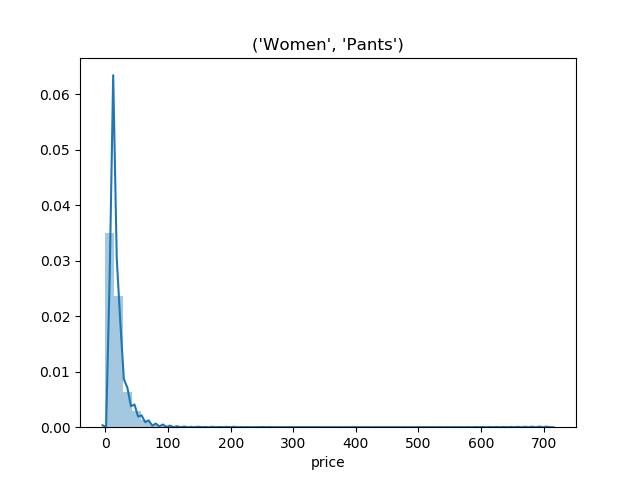

('Women', 'Shoes') 

count    77654.000000
mean        35.975610
std         35.725738
min          0.000000
25%         16.000000
50%         26.000000
75%         41.000000
max        770.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


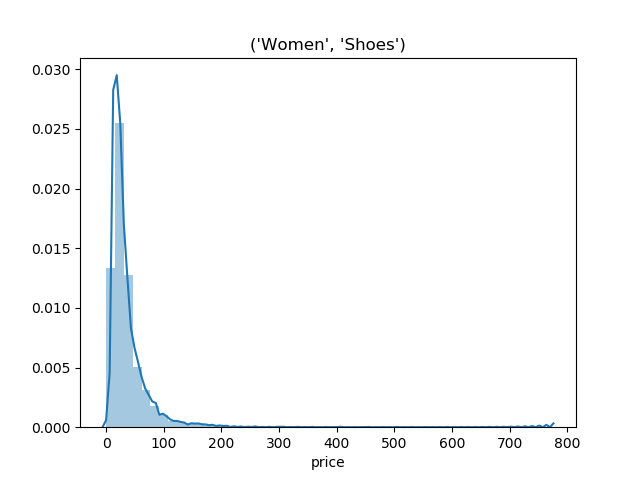

('Women', 'Skirts') 

count    10625.000000
mean        21.546541
std         15.626252
min          0.000000
25%         12.000000
50%         18.000000
75%         27.000000
max        306.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


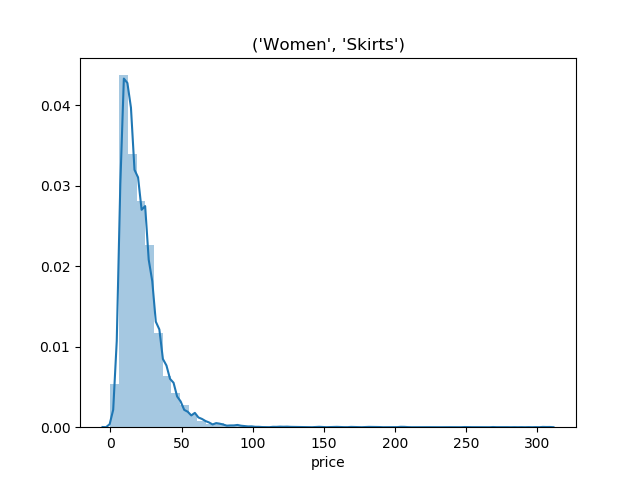

('Women', 'Suits & Blazers') 

count    1911.000000
mean       19.193616
std        12.105997
min         0.000000
25%        12.000000
50%        16.000000
75%        24.000000
max       173.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


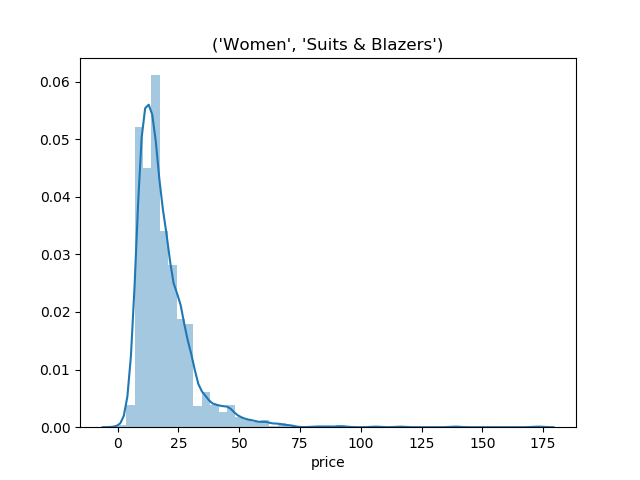

('Women', 'Sweaters') 

count    34312.000000
mean        26.503293
std         22.283857
min          0.000000
25%         13.000000
50%         20.000000
75%         33.000000
max        590.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


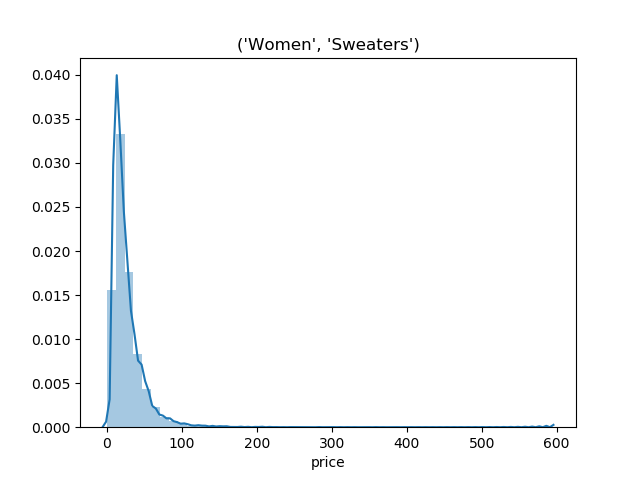

('Women', 'Swimwear') 

count    18420.000000
mean        21.838491
std         19.728922
min          0.000000
25%         12.000000
50%         16.000000
75%         25.000000
max        418.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


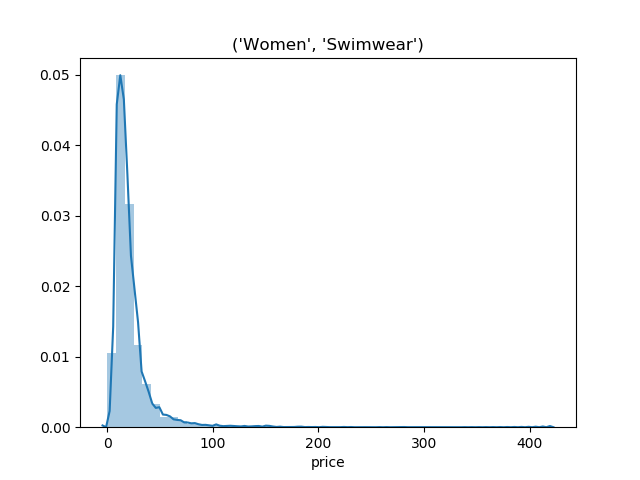

('Women', 'Tops & Blouses') 

count    106960.000000
mean         18.237514
std          15.603312
min           0.000000
25%          10.000000
50%          14.000000
75%          22.000000
max        1525.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


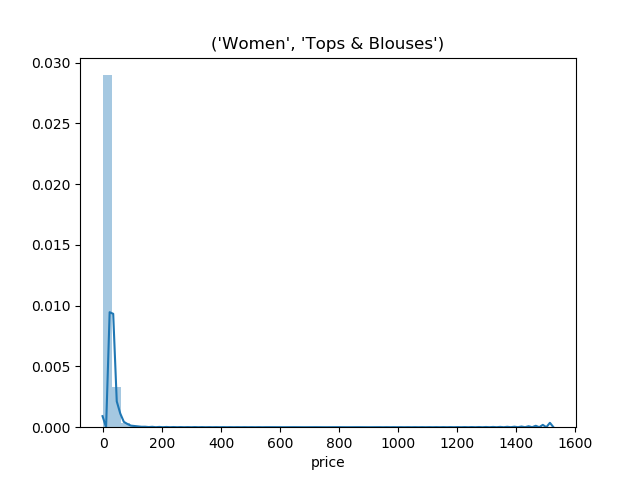

('Women', 'Underwear') 

count    33784.000000
mean        18.097813
std         15.935375
min          0.000000
25%         10.000000
50%         14.000000
75%         22.000000
max       1400.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


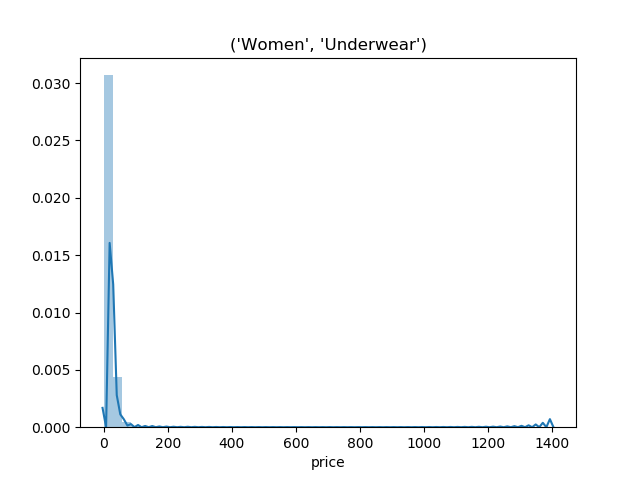

('Women', "Women's Accessories") 

count    42350.000000
mean        30.930531
std         45.428456
min          0.000000
25%         10.000000
50%         18.000000
75%         34.000000
max       1999.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


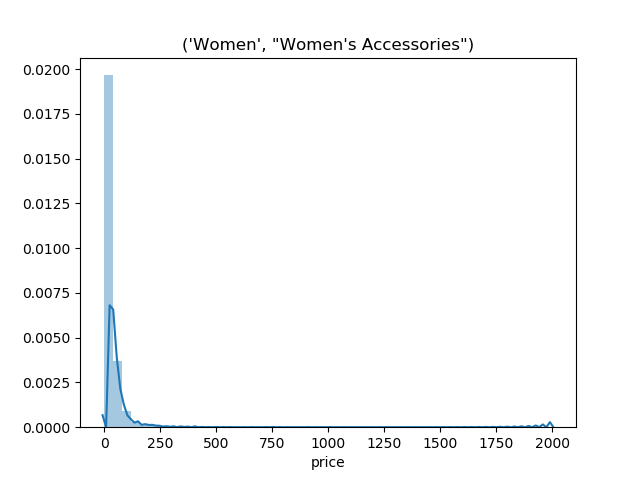

('Women', "Women's Handbags") 

count    45862.000000
mean        58.201648
std         96.200972
min          0.000000
25%         18.000000
50%         31.000000
75%         65.000000
max       2009.000000
Name: price, dtype: float64


<IPython.core.display.Javascript object>


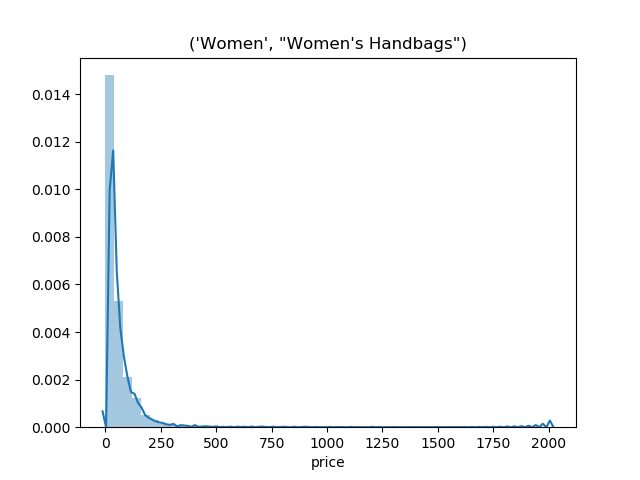

In [88]:
for key2, df2 in merged_train.groupby(['category_main', 'category_sub1']):
    print(key2, '\n')
    print(df2['price'].describe())
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.title(key2)
    sns.distplot(ax=ax,a=df2['price'])